<a href="https://colab.research.google.com/github/shamabansal17/Startups_funding_Analysis/blob/main/funding_startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funding in startups
Explore the correlation between a startup's funding characteristics and its funding success, examining factors such as the funding rounds, funding types, and geographical locations. Additionally, assess the impact of economic factors on funding, and propose strategies for startups to optimize their funding journeys. This project has the potential to offer valuable insights for both aspiring entrepreneurs and investors in the dynamic landscape of startup financing.


# Startup Funding Analysis

## Project Overview

This project aims to uncover trends and insights that guide strategic decision-making in the startup ecosystem. By analyzing the distribution of funding across different categories, markets, and regions, the project identifies sectors with higher investment potential. It also explores the correlation between a startup's funding characteristics and its success, examining factors such as funding rounds, funding types, and geographical locations. Additionally, the project assesses the impact of economic factors on funding and proposes strategies for startups to optimize their funding journeys.

## Objectives

1. **Distribution Analysis**:
   - Analyze the distribution of startup funding across various categories, such as industry sectors, markets, and geographical regions.
   - Identify sectors with higher investment potential.

2. **Correlation Analysis**:
   - Explore the relationship between funding characteristics (e.g., funding rounds, types of investors, and location) and the success of startups.
   - Investigate the impact of geographical location on funding opportunities.

3. **Strategic Recommendations**:
   - Propose strategies for startups to optimize their funding journeys based on insights from the analysis.
   - Provide actionable recommendations for aspiring entrepreneurs and investors.


# <font color='diamond' size=6> *Importing Necessary Libraries and dataset*

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# @title *Downloading the dataset*
! gdown 110tJaSocsCTvgqjJ3LyfzZOmhy8woTfP

Downloading...
From: https://drive.google.com/uc?id=110tJaSocsCTvgqjJ3LyfzZOmhy8woTfP
To: /content/investments_VC.csv
100% 12.5M/12.5M [00:00<00:00, 59.3MB/s]


In [ ]:
# Checking the dataset encoding
import chardet

with open('investments_VC.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))          # 10000 will read 1 mb data only to speed up , it should be use for bigger datasets

print(result['encoding'])

ISO-8859-1


In [ ]:
# @title *Reading dataset*
df=pd.read_csv('investments_VC.csv',encoding='latin')
df.head()

permalink                name  \
0            /organization/waywire            #waywire   
1  /organization/tv-communications  &TV Communications   
2    /organization/rock-your-paper   'Rock' Your Paper   
3   /organization/in-touch-network   (In)Touch Network   
4   /organization/r-ranch-and-mine  -R- Ranch and Mine   

                    homepage_url  \
0         http://www.waywire.com   
1          http://enjoyandtv.com   
2   http://www.rockyourpaper.org   
3  http://www.InTouchNetwork.com   
4                            NaN   

                                       category_list        market   \
0         |Entertainment|Politics|Social Media|News|          News    
1                                            |Games|         Games    
2                             |Publishing|Education|    Publishing    
3  |Electronics|Guides|Coffee|Restaurants|Music|i...   Electronics    
4                      |Tourism|Entertainment|Games|       Tourism    

   funding_total_usd      status country_code state_code         region  ...  \
0          17,50,000    acquired          USA         NY  New York City  ...   
1          40,00,000   operating          USA         CA    Los Angeles  ...   
2             40,000   operating          EST        NaN        Tallinn  ...   
3          15,00,000   operating          GBR        NaN         London  ...   
4             60,000   operating          USA         TX         Dallas  ...   

  secondary_market  product_crowdfunding round_A round_B round_C  round_D  \
0              0.0                   0.0     0.0     0.0     0.0      0.0   
1              0.0                   0.0     0.0     0.0     0.0      0.0   
2              0.0                   0.0     0.0     0.0     0.0      0.0   
3              0.0                   0.0     0.0     0.0     0.0      0.0   
4              0.0                   0.0     0.0     0.0     0.0      0.0   

  round_E round_F  round_G  round_H  
0     0.0     0.0      0.0      0.0  
1     0.0     0.0      0.0      0.0  
2     0.0     0.0      0.0      0.0  
3     0.0     0.0      0.0      0.0  
4     0.0     0.0      0.0      0.0  

[5 rows x 39 columns]

In [ ]:
! gdown 1oQX-4sum2y8cCRYdO3_qV928qaXemY5YR-da1h0lZf8

Downloading...
From (original): https://drive.google.com/uc?id=1oQX-4sum2y8cCRYdO3_qV928qaXemY5YR-da1h0lZf8
From (redirected): https://docs.google.com/document/d/1oQX-4sum2y8cCRYdO3_qV928qaXemY5YR-da1h0lZf8/export?format=docx
To: /content/Startup funding Data description.docx
8.95kB [00:00, 29.1MB/s]


In [ ]:
! pip install python-docx

from docx import Document
doc = Document('Startup funding Data description.docx')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 3.2 MB/s eta 0:00:00


In [ ]:
# @title *Reading information about dataset columns*
for table in doc.tables:
    for i, row in enumerate(table.rows):
        row_data = [cell.text.strip() for cell in row.cells]
        if i == 0:
              print(f"{'Column Index':<15} {'Column Name':<20} {'Description':<50}")  # Table headers
              print("=" * 90)
        else:
              print(f"{row_data[0]:<15} {row_data[1]:<20} {row_data[2]:<50}")

Column Index    Column Name          Description                                       
0               permalink            Static hyperlink for the startup on Crunchbase... 
1               name                 name of the startup                               
2               homepage_url         Website address of the startup                    
3               category_list        in which category the startups fall               
4               market               which market the startup caters to                
5               funding_total_usd    total funding received(in USD)                    
6               status               current operating status                          
7               country_code         country of origin                                 
8               state_code           state of origin                                   
9               region               region                                            
10              city            

# <font color='diamond' size=6> *Understanding the dataset*

In [ ]:
# @title *Identifying the variables and datatypes*
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

- Dataset has 39 columns with 54294 rows.
- 16 columns have object datatype while 23 have float datatype.


In [ ]:
# @title *Analysing null values*
df.isna().sum()

permalink                4856
name                     4857
homepage_url             8305
category_list            8817
 market                  8824
 funding_total_usd       4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C                  4856
round_D                  4856
round_E                  4856
round_F                  4856
round_G                  4856
round_H                  4856
dtype: int64

In [ ]:
# @title *Dropping rows with all null values*
df=df[~df.isna().all(axis=1)]
df.isna().sum()/len(df)*100

permalink                0.000000
name                     0.002023
homepage_url             6.976415
category_list            8.012056
 market                  8.026215
 funding_total_usd       0.000000
status                   2.657875
country_code            10.665885
state_code              38.992273
region                  10.665885
city                    12.371051
funding_rounds           0.000000
founded_at              22.015454
founded_month           22.161091
founded_quarter         22.161091
founded_year            22.161091
first_funding_at         0.000000
last_funding_at          0.000000
seed                     0.000000
venture                  0.000000
equity_crowdfunding      0.000000
undisclosed              0.000000
convertible_note         0.000000
debt_financing           0.000000
angel                    0.000000
grant                    0.000000
private_equity           0.000000
post_ipo_equity          0.000000
post_ipo_debt            0.000000
secondary_market         0.000000
product_crowdfunding     0.000000
round_A                  0.000000
round_B                  0.000000
round_C                  0.000000
round_D                  0.000000
round_E                  0.000000
round_F                  0.000000
round_G                  0.000000
round_H                  0.000000
dtype: float64

We have seen that there are 4856 rows which are completely null for all columns, so just dropped them.

In [ ]:
# @title *Checking for duplicate rows*
df[df.duplicated()]

Empty DataFrame
Columns: [permalink, name, homepage_url, category_list,  market ,  funding_total_usd , status, country_code, state_code, region, city, funding_rounds, founded_at, founded_month, founded_quarter, founded_year, first_funding_at, last_funding_at, seed, venture, equity_crowdfunding, undisclosed, convertible_note, debt_financing, angel, grant, private_equity, post_ipo_equity, post_ipo_debt, secondary_market, product_crowdfunding, round_A, round_B, round_C, round_D, round_E, round_F, round_G, round_H]
Index: []

[0 rows x 39 columns]

No duplicate rows are given in the data.

In [ ]:
# @title *Checking for unique values*
df.nunique()

permalink               49436
name                    49350
homepage_url            45850
category_list           16675
 market                   753
 funding_total_usd      14617
status                      3
country_code              115
state_code                 61
region                   1089
city                     4188
funding_rounds             17
founded_at               3369
founded_month             420
founded_quarter           218
founded_year              103
first_funding_at         3914
last_funding_at          3657
seed                     3337
venture                  9300
equity_crowdfunding       252
undisclosed               687
convertible_note          299
debt_financing           1872
angel                     999
grant                     532
private_equity            847
post_ipo_equity           239
post_ipo_debt              57
secondary_market           20
product_crowdfunding      176
round_A                  2035
round_B                  1269
round_C                   740
round_D                   458
round_E                   225
round_F                   110
round_G                    32
round_H                     5
dtype: int64

We can see there are
- 3 different status for startups,
- market category is 753,
-  115 country data startups data is there which can be further divided into 61 state code, (country cant be more than state, it just too much data is missing or invalid in state column,
- regions are 1089 and
- 4188 unique cities startups information is provided,
- with 103 funding years data.

# <font color='diamond' size=6> *Cleaning the dataset*

In [ ]:
# checking column names
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [ ]:
# Renaming/Stripping column Names
df.columns=df.columns.str.strip()
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

There was inconsistency in column names with trailing spaces which are replaced with cleaned names.

In [ ]:
# @title *Cleaning columns and Correcting their datatypes*
df['funding_total_usd']=df['funding_total_usd'].str.strip().str.replace(',','').str.replace('-','0')
df['funding_total_usd']=df['funding_total_usd'].astype('int')

In [ ]:
# finding null row of column- 'NAME"
df[df['name'].isna()]

permalink name           homepage_url category_list  \
28221  /organization/tell-it-in  NaN  http://tellitin10.com    |Startups|   

           market  funding_total_usd  status country_code state_code region  \
28221   Startups               25000  closed          NaN        NaN    NaN   

       ... secondary_market  product_crowdfunding round_A round_B round_C  \
28221  ...              0.0                   0.0     0.0     0.0     0.0   

       round_D round_E round_F  round_G  round_H  
28221      0.0     0.0     0.0      0.0      0.0  

[1 rows x 39 columns]

In [ ]:
# filling 'NAME' column null value by using hyperlink
df['name'].fillna('Tell It in 10',inplace=True)

In [ ]:
# @title *Treating Missing Vlaues*
df[['category_list','market']].isna().sum()

category_list    3961
market           3968
dtype: int64

In [ ]:
# finding rows where category is given but market column is null as market is related to category of startup.
df[(~df['category_list'].isna() ) & (df['market'].isna())]

name                          category_list market  \
2546                  AnonaBox                 |Consumer Electronics|    NaN   
9174                    Cognea         |Pervasive Computing|Startups|    NaN   
11735              Digitalcade    |Entertainment|Skill Gaming|Mobile|    NaN   
18973         High Brew Coffee        |Consumer Goods|Coffee|Brewing|    NaN   
22974                   Klique   |Group Email|Group SMS|Social Media|    NaN   
43167  Three Spires Brewing Co                              |Brewing|    NaN   
44766                    Ubalo  |Cloud Computing|Pervasive Computing|    NaN   

       funding_total_usd     status country_code state_code  \
2546              600000  operating          USA         CA   
9174                   0   acquired          NaN        NaN   
11735             100000  operating          NaN        NaN   
18973            4400000  operating          USA         TX   
22974            2075000  operating          USA         FL   
43167              30000  operating          NaN        NaN   
44766                  0   acquired          NaN        NaN   

                  region    city  funding_rounds  ... secondary_market  \
2546   Sacramento Valley   Chico             1.0  ...              0.0   
9174                 NaN     NaN             1.0  ...              0.0   
11735                NaN     NaN             1.0  ...              0.0   
18973             Austin  Austin             1.0  ...              0.0   
22974    Naples, Florida  Naples             1.0  ...              0.0   
43167                NaN     NaN             1.0  ...              0.0   
44766                NaN     NaN             1.0  ...              0.0   

      product_crowdfunding round_A  round_B round_C round_D  round_E  round_F  \
2546              600000.0     0.0      0.0     0.0     0.0      0.0      0.0   
9174                   0.0     0.0      0.0     0.0     0.0      0.0      0.0   
11735                  0.0     0.0      0.0     0.0     0.0      0.0      0.0   
18973                  0.0     0.0      0.0     0.0     0.0      0.0      0.0   
22974                  0.0     0.0      0.0     0.0     0.0      0.0      0.0   
43167                  0.0     0.0      0.0     0.0     0.0      0.0      0.0   
44766                  0.0     0.0      0.0     0.0     0.0      0.0      0.0   

       round_G  round_H  
2546       0.0      0.0  
9174       0.0      0.0  
11735      0.0      0.0  
18973      0.0      0.0  
22974      0.0      0.0  
43167      0.0      0.0  
44766      0.0      0.0  

[7 rows x 37 columns]

In [ ]:
# rows where catgory is given but not rows, filling them with category
df['category_list']=df['category_list'].str.strip('|').str.split('|')
df['market']=df.apply(lambda row: np.random.choice(row['category_list']) if (pd.isna(row['market']) and isinstance(row['category_list'],list)) else row['market'], axis=1)


In [ ]:
# @title *Filling Missing Values*
# assuming unknown status companies are closed but just imputing them with 'unknown
df[['category_list','market','status']]=df[['category_list','market','status']].fillna('unknown')


In [ ]:
# function to convert columns having datetime info to datetime dtype
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str,errors='coerce')
    except ValueError:
        return pd.to_datetime(date_str,dayfirst=True,errors='coerce')


In [ ]:
# Converting last_funding_at column into datetime datatype and treating missing values in column too
df['last_funding_at']=parse_date(df['last_funding_at'])

print('No of rows dropping = ',df['last_funding_at'].isna().sum())
df.drop(df[df['last_funding_at'].isna()].index,inplace=True)
# dropping rows where last_funding_at data is messed

No of rows dropping =  6


In [ ]:
# Converting first_funding_at column into datetime datatype and treating missing values in column too
print('Missing rows of first_funding_at column are = ',parse_date(df['first_funding_at']).isna().sum())
print('*'*60)

rep_dic={'0007-05-13':'2013-05-07',
         '0011-11-14':'2014-11-11'
         }
df['first_funding_at']=df['first_funding_at'].replace(rep_dic)

df['first_funding_at']=parse_date(df['first_funding_at'])
print('No of rows dropping = ',df['first_funding_at'].isna().sum())

df.drop(df[df['first_funding_at'].isna()].index,inplace=True)
df.reset_index(drop=True, inplace=True)
# dropping rows where first_founding_at is messed and funding=0

index                                      category_list  \
0          0      [Entertainment, Politics, Social Media, News]   
1          1                                            [Games]   
2          2                            [Publishing, Education]   
3          3  [Electronics, Guides, Coffee, Restaurants, Mus...   
4          4                    [Tourism, Entertainment, Games]   
...      ...                                                ...   
49425  49433  [Analytics, Gamification, Developer APIs, iOS,...   
49426  49434                              [Enterprise Software]   
49427  49435   [Web Development, Advertising, Wireless, Mobile]   
49428  49436                                            [Games]   
49429  49437                              [Enterprise Software]   

                      market  funding_total_usd     status country_code  \
0                      News             1750000   acquired          USA   
1                     Games             4000000  operating          USA   
2                Publishing               40000  operating          EST   
3               Electronics             1500000  operating          GBR   
4                   Tourism               60000  operating          USA   
...                      ...                ...        ...          ...   
49425             Education              320000  operating          GBR   
49426   Enterprise Software             1587301  operating          CHN   
49427       Web Development               97398  operating          HRV   
49428                 Games             9300000  operating       Others   
49429   Enterprise Software            45000000  operating          USA   

      state_code         region         city  funding_rounds  ...  \
0             NY  New York City     New York             1.0  ...   
1             CA    Los Angeles  Los Angeles             2.0  ...   
2         Others        Tallinn      Tallinn             1.0  ...   
3         Others         London       London             1.0  ...   
4             TX         Dallas   Fort Worth             2.0  ...   
...          ...            ...          ...             ...  ...   
49425     Others         London       London             1.0  ...   
49426     Others        Beijing      Beijing             1.0  ...   
49427     Others          Split        Split             5.0  ...   
49428     Others         Others       Others             1.0  ...   
49429         NY  New York City     New York             4.0  ...   

       secondary_market  product_crowdfunding     round_A     round_B round_C  \
0                   0.0                   0.0         0.0         0.0     0.0   
1                   0.0                   0.0         0.0         0.0     0.0   
2                   0.0                   0.0         0.0         0.0     0.0   
3                   0.0                   0.0         0.0         0.0     0.0   
4                   0.0                   0.0         0.0         0.0     0.0   
...                 ...                   ...         ...         ...     ...   
49425               0.0                   0.0         0.0         0.0     0.0   
49426               0.0                   0.0   1587301.0         0.0     0.0   
49427               0.0                   0.0         0.0         0.0     0.0   
49428               0.0                   0.0         0.0         0.0     0.0   
49429               0.0                   0.0  16000000.0  10000000.0     0.0   

       round_D  round_E  round_F  round_G  round_H  
0          0.0      0.0      0.0      0.0      0.0  
1          0.0      0.0      0.0      0.0      0.0  
2          0.0      0.0      0.0      0.0      0.0  
3          0.0      0.0      0.0      0.0      0.0  
4          0.0      0.0      0.0      0.0      0.0  
...        ...      ...      ...      ...      ...  
49425      0.0      0.0      0.0      0.0      0.0  
49426      0.0      0.0      0.0      0.0      0.0  
49427      0.0      0.

In [ ]:
# Converting founded_at column into datetime datatype and treating missing values in column too
df['founded_at']=parse_date(df['founded_at'])
print(df['founded_at'].isna().sum())

10881


In [ ]:
# finding the median of difference of days from founded at and first funding to fill null values

df_clean=df[~df['founded_at'].isna()]
med_days=(df_clean['first_funding_at']-df_clean['founded_at']).dt.days.median()
df['founded_at']=df['founded_at'].fillna(df['first_funding_at']-pd.to_timedelta(med_days,unit='d'))

In [ ]:
# cleaning and extracting month from founded_at column to fill missing values

df['founded_month']=df['founded_month']+'-01'                # adding date 01 to each month data
df['founded_month']=parse_date(df['founded_month']).dt.month

print('No of rows having null values : ',df['founded_month'].isna().sum(),'\n\n')
print(f"No of month matching with founded at : \n{ (df['founded_at'].dt.month==df['founded_month']).value_counts() }")

df['founded_month'].fillna(df['founded_at'].dt.month,inplace=True)
df['founded_month']=df['founded_month'].astype('int')

No of rows having null values :  10952
No of month matching with founded at : 
 True     38478
False    10952
Name: count, dtype: int64


In [ ]:
# cleaning and extracting quarter from founded_at column to fill missing values

df['founded_quarter']=df['founded_quarter'].str.split('').str[-2]

print('No of rows having null values : ',df['founded_quarter'].isna().sum(),'\n\n')
print(f"No of quarter matching with founded at : \n{(df['founded_at'].dt.quarter.astype(str)==df['founded_quarter']).value_counts()}")

df['founded_quarter'].fillna(df['founded_at'].dt.quarter,inplace=True)
df['founded_quarter']=df['founded_quarter'].astype('int')

No of rows having null values :  10952
No of month matching with founded at : 
True     38478
False    10952
Name: count, dtype: int64


In [ ]:
# cleaning and extracting year from founded_at column to fill missing values

print('No of rows having null values : ',df['founded_year'].isna().sum(),'\n\n')
print(f"No of year matching with founded at : \n{(df['founded_at'].dt.year==df['founded_year']).value_counts()}")

df['founded_year'].fillna(df['founded_at'].dt.year,inplace=True)
df['founded_year']=df['founded_year'].astype('int')

No of rows having null values :  10952 


No of year matching with founded at : 
True     38478
False    10952
Name: count, dtype: int64


In [ ]:
# @title *Dropping unnecessary columns*
df.drop(columns=['permalink','homepage_url''name','founded_at'],inplace=True)


In [ ]:
# filling the remaining missing values in categorial columns by 'OTHERS'
df.fillna('Others',inplace=True)

In [ ]:
# checking cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49430 entries, 0 to 49437
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   category_list         49430 non-null  object        
 1   market                49430 non-null  object        
 2   funding_total_usd     49430 non-null  int64         
 3   status                49430 non-null  object        
 4   country_code          49430 non-null  object        
 5   state_code            49430 non-null  object        
 6   region                49430 non-null  object        
 7   city                  49430 non-null  object        
 8   funding_rounds        49430 non-null  float64       
 9   founded_month         49430 non-null  int64         
 10  founded_quarter       49430 non-null  int64         
 11  founded_year          49430 non-null  int64         
 12  first_funding_at      49430 non-null  datetime64[ns]
 13  last_funding_at      

# <font color='diamond' size=6> *Exploratory Data Analysis*

In [ ]:
# checking whether the total_fund_usd and total fundings amount given in different round and type is same
df[(df.iloc[:,14:27].sum(axis=1)-df['funding_total_usd']).gt(0)].shape[0]/len(df)*100

0.0

In [ ]:
df[(df.iloc[:,27:].sum(axis=1)-df['funding_total_usd']).lt(0)].shape[0]/len(df)*100
# as round only include fundings from some type and not all, it is not equal to total_fundings

68.50293344123001

In [ ]:
# creating a list to have funding amount columns only
fund_col=df.columns[14:].to_list()
fund_col.insert(0,'funding_total_usd')
print(fund_col)

['funding_total_usd', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']


In [ ]:
# coverting Fund columns into Per Million
df[fund_col]=df[fund_col]/1000000

In [ ]:
# df.drop('index',axis=1,inplace=True)           should be removed

In [ ]:
# Segregating data for startups having no fund
df_no_fund=df[df['funding_total_usd']==0].iloc[:,:14]
df_no_fund.columns=df_no_fund.columns+'_no_fund'
df_no_fund.head()

category_list_no_fund         market_no_fund  \
8                         [Software]              Software    
11  [Entertainment, Games, Software]              Software    
12             [Health and Wellness]   Health and Wellness    
14                     [Real Estate]           Real Estate    
19                     [Curated Web]           Curated Web    

    funding_total_usd_no_fund status_no_fund country_code_no_fund  \
8                         0.0      operating                  USA   
11                        0.0      operating                  USA   
12                        0.0      operating                  USA   
14                        0.0      operating                  USA   
19                        0.0      operating                  DEU   

   state_code_no_fund         region_no_fund       city_no_fund  \
8                  IL  Springfield, Illinois          Champaign   
11                 NC             NC - Other  Connellys Springs   
12                 CA            Los Angeles        Los Angeles   
14                 FL                Orlando            Orlando   
19             Others                 Berlin             Berlin   

    funding_rounds_no_fund  founded_month_no_fund  founded_quarter_no_fund  \
8                      1.0                      1                        1   
11                     1.0                     10                        4   
12                     1.0                      1                        1   
14                     1.0                     12                        4   
19                     1.0                      3                        1   

    founded_year_no_fund first_funding_at_no_fund last_funding_at_no_fund  
8                   2010               2014-07-24              2014-07-24  
11                  2011               2013-04-21              2013-04-21  
12                  1986               2010-08-19              2010-08-19  
14                  2013               2014-01-22              2014-01-22  
19                  2010               2011-09-16              2011-09-16

In [ ]:
df_fund=df[~df.index.isin(df_no_fund.index)]
df_fund.columns=df_fund.columns+'_fund'
df_fund.head()

category_list_fund    market_fund  \
0      [Entertainment, Politics, Social Media, News]          News    
1                                            [Games]         Games    
2                            [Publishing, Education]    Publishing    
3  [Electronics, Guides, Coffee, Restaurants, Mus...   Electronics    
4                    [Tourism, Entertainment, Games]       Tourism    

   funding_total_usd_fund status_fund country_code_fund state_code_fund  \
0                    1.75    acquired               USA              NY   
1                    4.00   operating               USA              CA   
2                    0.04   operating               EST          Others   
3                    1.50   operating               GBR          Others   
4                    0.06   operating               USA              TX   

     region_fund    city_fund  funding_rounds_fund  founded_month_fund  ...  \
0  New York City     New York                  1.0                   6  ...   
1    Los Angeles  Los Angeles                  2.0                  12  ...   
2        Tallinn      Tallinn                  1.0                  10  ...   
3         London       London                  1.0                   4  ...   
4         Dallas   Fort Worth                  2.0                   1  ...   

   secondary_market_fund  product_crowdfunding_fund round_A_fund round_B_fund  \
0                    0.0                        0.0          0.0          0.0   
1                    0.0                        0.0          0.0          0.0   
2                    0.0                        0.0          0.0          0.0   
3                    0.0                        0.0          0.0          0.0   
4                    0.0                        0.0          0.0          0.0   

   round_C_fund  round_D_fund  round_E_fund  round_F_fund  round_G_fund  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   round_H_fund  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  

[5 rows x 35 columns]

In [ ]:
# Checking number of startups having no fund and having fund
print('shape of dataframe of companies having no outside funding: ',df_no_fund.shape)
print('shape of dataframe of companies having outside funding rounds: ',df_fund.shape)


shape of dataframe of companies having no outside funding:  (8523, 14)
shape of dataframe of companies having outside funding rounds:  (40907, 35)


- There are 8523 startups that are either relying on their personal fundings or have closed down due to not getting fundings. Lets explore it later.
- While 40907 got fundings for their operations.


In [ ]:
# @title *Descriptive Analysis*
df.describe(include='object')

category_list      market     status country_code state_code  \
count          49430       49430      49430        49430      49430   
unique         16672         760          4          116         62   
top          unknown   Software   operating          USA     Others   
freq            3960        4619      41821        28793      19269   

             region    city  
count         49430   49430  
unique         1090    4189  
top     SF Bay Area  Others  
freq           6804    6112

- Almost 4600 i.e. 10% of startups belong to `Software` Market and out of which 4050 got fundings means 550+are working without external fundings.
- 84% + startups have Opertaing status while for startups who dont get fundings but are operating are even 86% + which shows fundings dont have any effect on operating status atleast. Will confirm via hypothesis later.
- In the given data, 58% + startups are from USA, while as we had seen before state name are missing in half of the dataset so we cant analyse much from here. So dropping that too.
- If we talk about

In [ ]:
df_no_fund.describe(include='object')

category_list_no_fund market_no_fund status_no_fund  \
count                   8523           8523           8523   
unique                  2930            545              4   
top                  unknown        unknown      operating   
freq                    1457           1457           7395   

       country_code_no_fund state_code_no_fund region_no_fund city_no_fund  
count                  8523               8523           8523         8523  
unique                   85                 61            627         1827  
top                     USA             Others         Others       Others  
freq                   4316               3981           1450         1607

In [ ]:
df_fund.describe(include='object')

category_list_fund market_fund status_fund country_code_fund  \
count               40907       40907       40907             40907   
unique              14278         741           4               111   
top       [Biotechnology]   Software    operating               USA   
freq                 3442        4050       34426             24477   

       state_code_fund  region_fund city_fund  
count            40907        40907     40907  
unique              62         1032      3587  
top             Others  SF Bay Area    Others  
freq             15288         5994      4505

- Dataset has 39 columns with 54294 rows out of which we kept 35 columns with 49430 rows.
- 16 columns have datatype object while 23 have float datatype but after cleaning we are left with 7 object,4 int,2 datetime and 22 float datatype columns.
- We have seen that there are 4856 rows which are completely null for all columns, so just dropped them.
- There are 3 diff status for startups,market categories are 753,115 countries startups data is there which can be further divided into 61 state code, (country cant be more than state, it shows too much data is missing or invalid in state column, regions are 1089 and 4188 unique cities startups information is provided about 103 funding years.
- The data where it is missed for categorial columns are imputed with `Unknown` and `Others` name.
- Month,Quarter and Year of founding year has been extracted from founded_at column.
- Total_funding_amount is distributed among different funding types.
- 17.24 % of startups didnot get fundings for their businesses or they didnt tried to raise while 88.76% startups got the fundings.
-
-


In [ ]:
# Function to print basic useful details for categorial column
def get_column_details(df,column,plt_req,plot_size,a=40):
    print("Details of",column,"column")
    print('*'*50)

    #DataType of column
    print("\nDataType: ",df[column].dtype)
    print('*'*50)


    #Get Number of Unique Values
    print("\nNumber of Unique Values: ",df[column].nunique())
    print('*'*50)


    #Get Category counts of Column
    print(f"\nCount of Companies {column} wise:\n")
    print(df[column].value_counts())
    print('*'*50)
    print(f"\nPercentage of companies {column} wise:\n")
    print(round(df[column].value_counts(normalize=True)*100,2))
    print('*'*50)

    # visualising plot
    plt.figure(figsize=plot_size)
    plt.title(f"\n\nNumber of Companies {column} wise\n")

    df[column].value_counts()[:a].plot(kind=plt_req)
    plt.gca().invert_yaxis()
    plt.show()

Details of market column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  759
**************************************************

Count of Companies market wise:

market
 Software              4619
unknown                3960
 Biotechnology         3688
 Mobile                1983
 E-Commerce            1805
                       ... 
 Contact Centers          1
 Swimming                 1
 Homeland Security        1
 Retirement               1
 Rural Energy             1
Name: count, Length: 759, dtype: int64
**************************************************

Percentage of companies market wise:

market
 Software              9.34
unknown                8.01
 Biotechnology         7.46
 Mobile                4.01
 E-Commerce            3.65
                       ... 
 Contact Centers       0.00
 Swimming              0.00
 Homeland Security     0.00
 Retirement            0.00
 Rural 

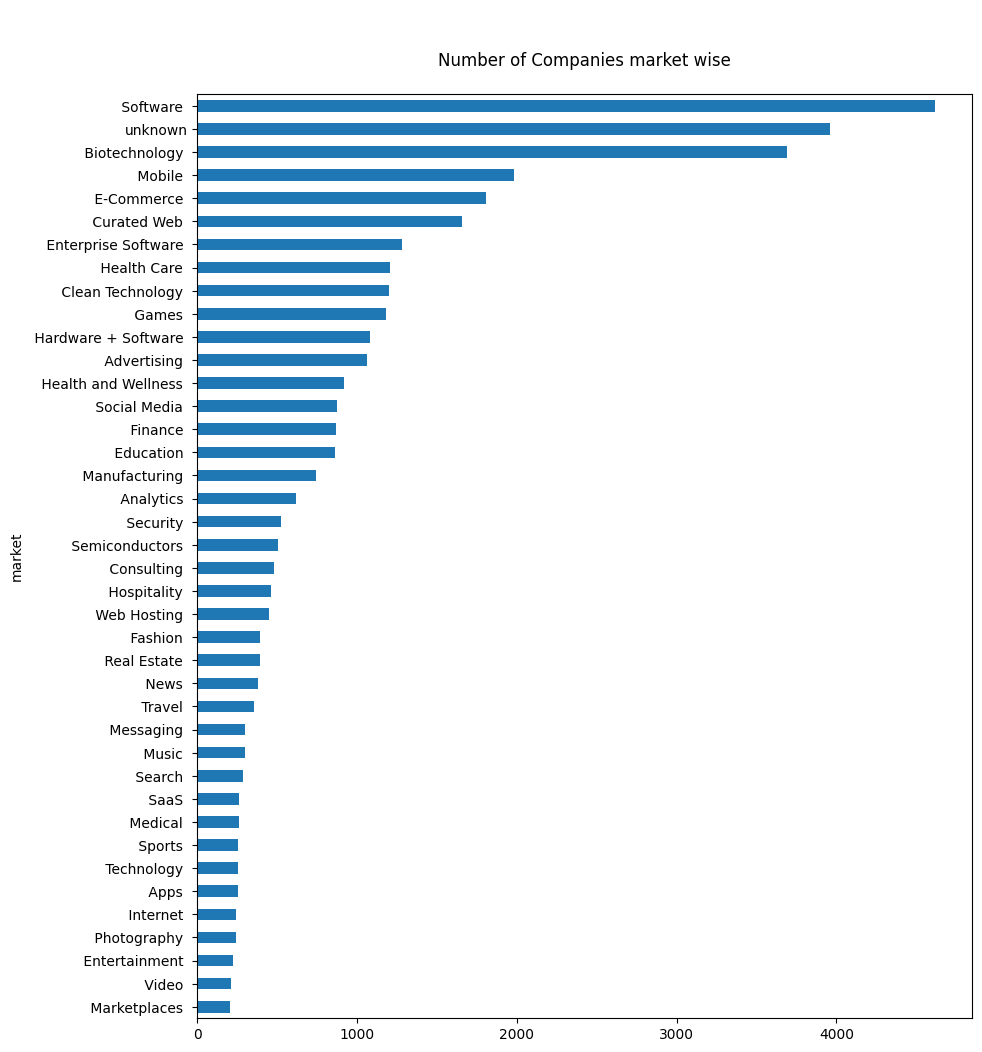

In [ ]:
get_column_details(df,column='market',plt_req='barh',plot_size=(10,12))

Details of market_no_fund column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  544
**************************************************

Count of Companies market_no_fund wise:

market_no_fund
unknown           1457
 Software          569
 E-Commerce        344
 Curated Web       319
 Mobile            273
                  ... 
 Licensing           1
 Displays            1
 Realtors            1
 Bio-Pharm           1
 Rural Energy        1
Name: count, Length: 544, dtype: int64
**************************************************

Percentage of companies market_no_fund wise:

market_no_fund
unknown           17.09
 Software          6.68
 E-Commerce        4.04
 Curated Web       3.74
 Mobile            3.20
                  ...  
 Licensing         0.01
 Displays          0.01
 Realtors          0.01
 Bio-Pharm         0.01
 Rural Energy      0.01
Name: proportion, Length: 544, dtype: 

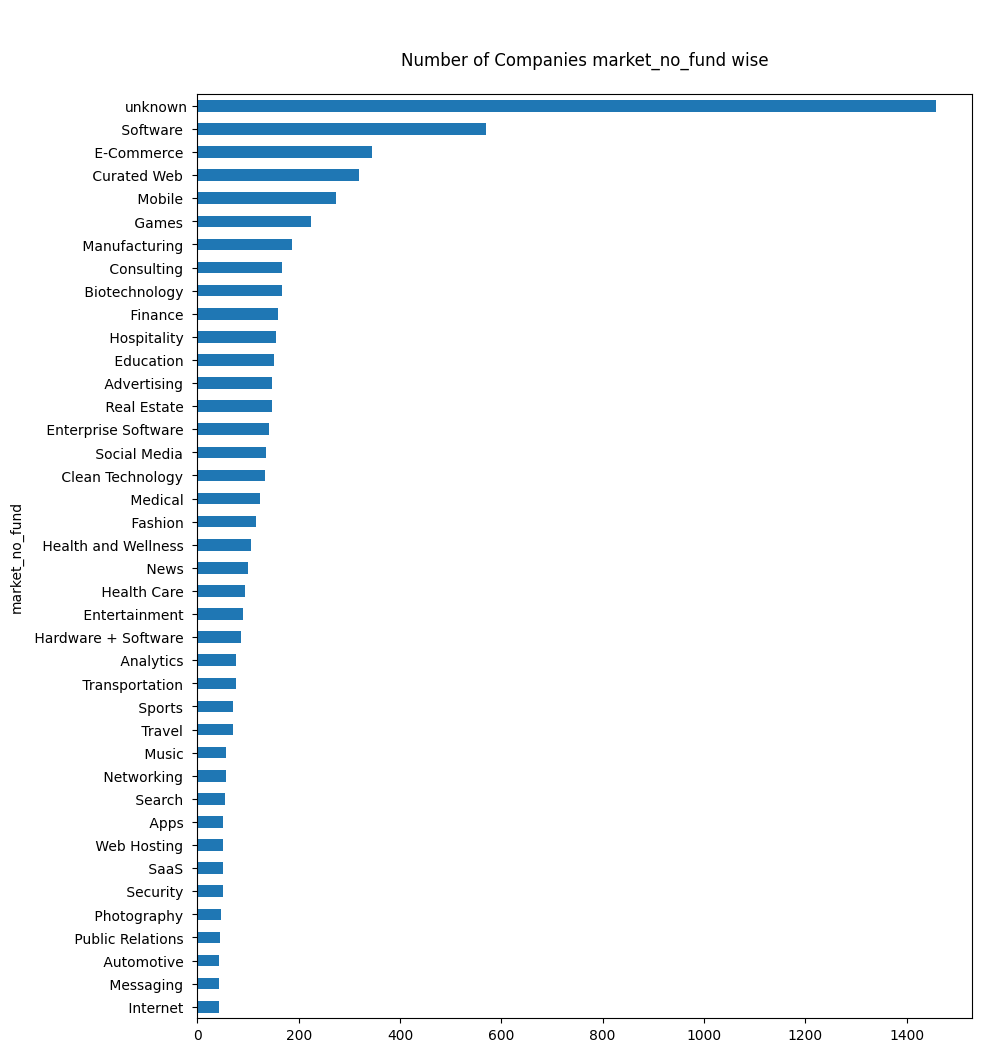

In [ ]:
get_column_details(df_no_fund,column='market_no_fund',plt_req='barh',plot_size=(10,12))

Details of market_fund column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  741
**************************************************

Count of Companies market_fund wise:

market_fund
 Software                 4050
 Biotechnology            3521
unknown                   2503
 Mobile                   1710
 E-Commerce               1461
                          ... 
Social Media                 1
 Cloud-Based Music           1
 Remediation                 1
 Lifestyle Businesses        1
 Clean Technology IT         1
Name: count, Length: 741, dtype: int64
**************************************************

Percentage of companies market_fund wise:

market_fund
 Software                 9.90
 Biotechnology            8.61
unknown                   6.12
 Mobile                   4.18
 E-Commerce               3.57
                          ... 
Social Media              0.00
 Cloud-Based

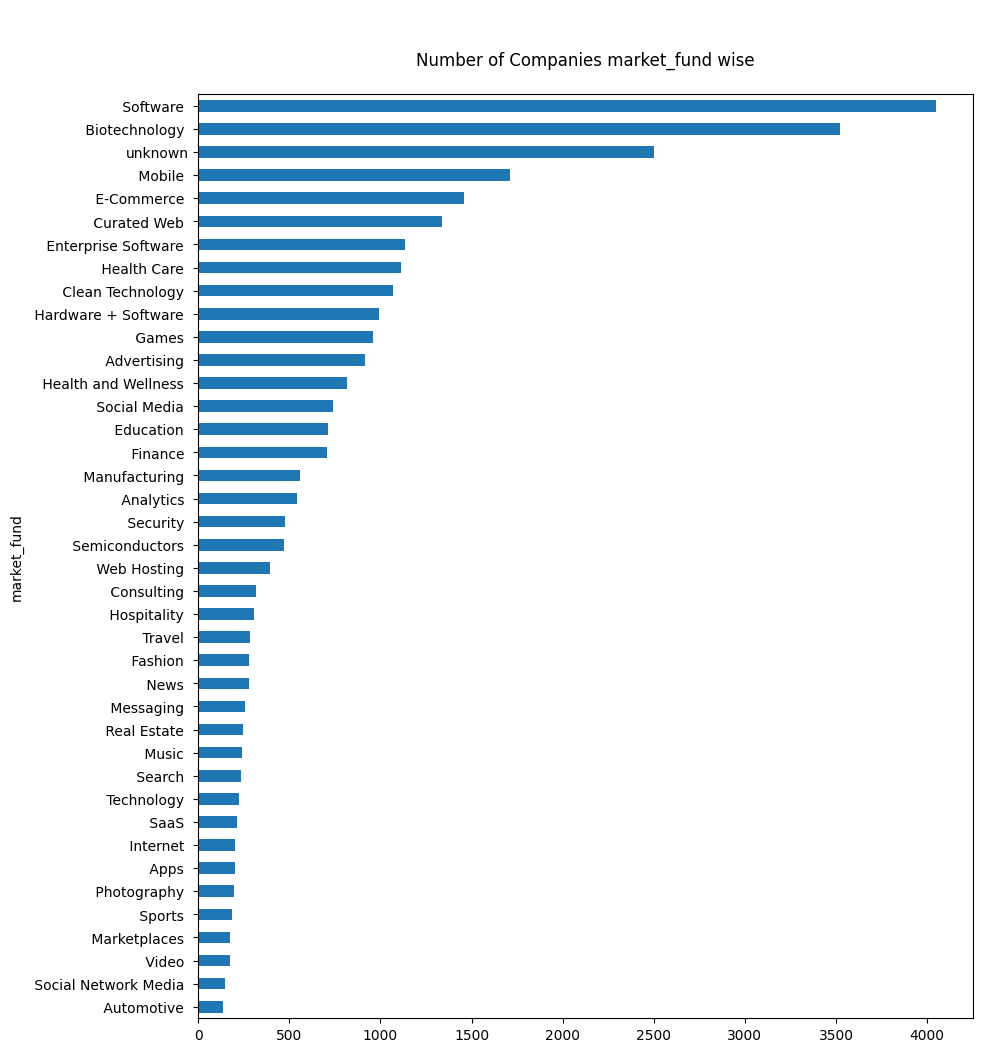

In [ ]:
get_column_details(df_fund,column='market_fund',plt_req='barh',plot_size=(10,12))


Details of status column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  4
**************************************************

Count of Companies status wise:

status
operating    41821
acquired      3692
closed        2603
unknown       1314
Name: count, dtype: int64
**************************************************

Percentage of companies status wise:

status
operating    84.61
acquired      7.47
closed        5.27
unknown       2.66
Name: proportion, dtype: float64
**************************************************


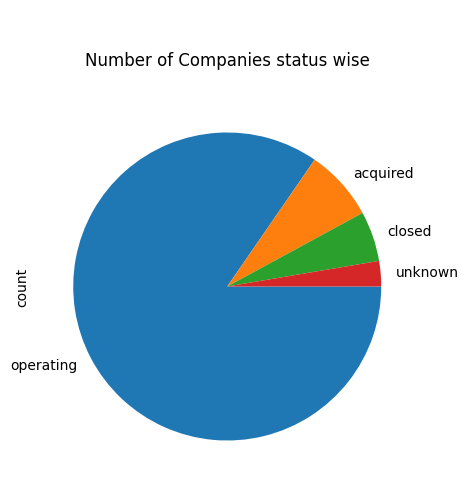

In [ ]:
get_column_details(df,column='status',plot_size=(5,5),plt_req='pie')

Details of status_no_fund column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  4
**************************************************

Count of Companies status_no_fund wise:

status_no_fund
operating    7395
acquired      474
closed        445
unknown       209
Name: count, dtype: int64
**************************************************

Percentage of companies status_no_fund wise:

status_no_fund
operating    86.77
acquired      5.56
closed        5.22
unknown       2.45
Name: proportion, dtype: float64
**************************************************


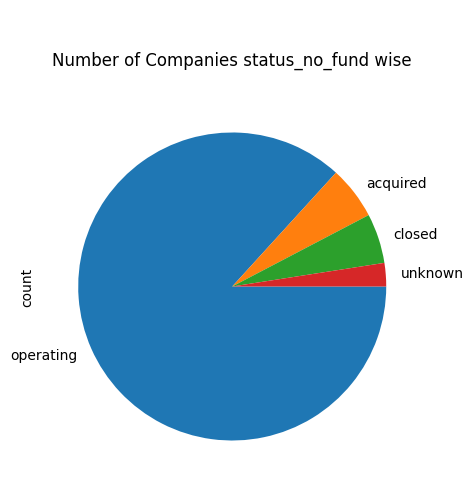

In [ ]:
get_column_details(df_no_fund,column='status_no_fund',plot_size=(5,5),plt_req='pie')

Details of status_fund column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  4
**************************************************

Count of Companies status_fund wise:

status_fund
operating    34426
acquired      3218
closed        2158
unknown       1105
Name: count, dtype: int64
**************************************************

Percentage of companies status_fund wise:

status_fund
operating    84.16
acquired      7.87
closed        5.28
unknown       2.70
Name: proportion, dtype: float64
**************************************************


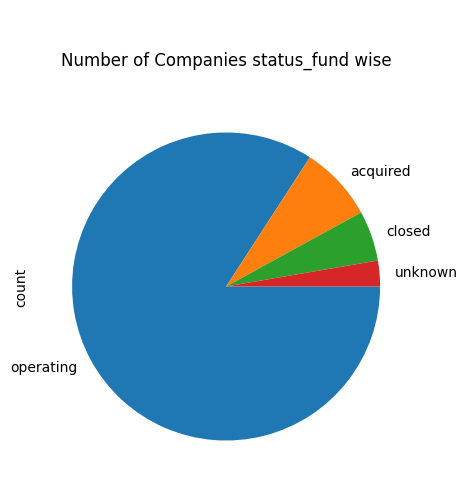

In [ ]:
get_column_details(df_fund,column='status_fund',plot_size=(5,5),plt_req='pie')


Details of country_code column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  116
**************************************************

Count of Companies country_code wise:

country_code
USA       28793
others     5269
GBR        2642
CAN        1405
CHN        1239
          ...  
ALB           1
MOZ           1
LIE           1
BRN           1
MAF           1
Name: count, Length: 116, dtype: int64
**************************************************

Percentage of companies country_code wise:

country_code
USA       58.25
others    10.66
GBR        5.34
CAN        2.84
CHN        2.51
          ...  
ALB        0.00
MOZ        0.00
LIE        0.00
BRN        0.00
MAF        0.00
Name: proportion, Length: 116, dtype: float64
**************************************************


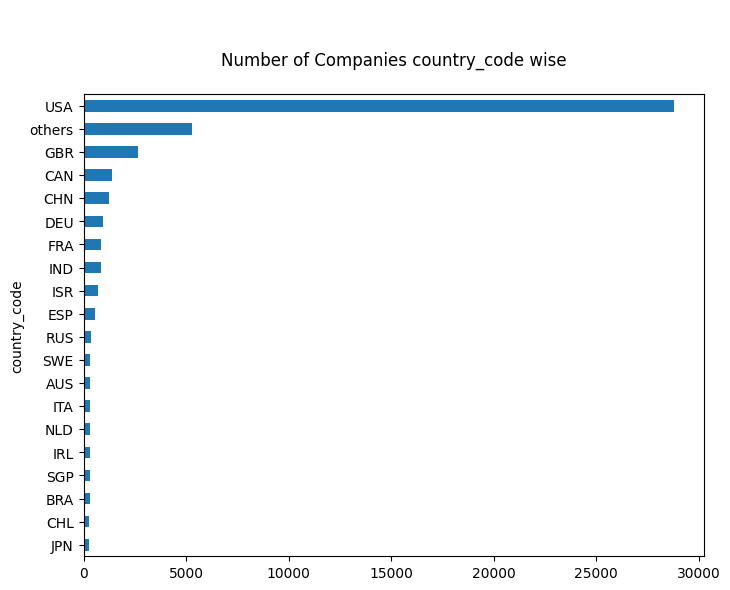

In [ ]:
get_column_details(df,column='country_code',plot_size=(8,6),plt_req='barh',a=20)

Details of country_code_no_fund column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  85
**************************************************

Count of Companies country_code_no_fund wise:

country_code_no_fund
USA       4316
others    1450
GBR        358
DEU        341
CHN        251
          ... 
TZA          1
HRV          1
BRN          1
BHR          1
MKD          1
Name: count, Length: 85, dtype: int64
**************************************************

Percentage of companies country_code_no_fund wise:

country_code_no_fund
USA       50.64
others    17.01
GBR        4.20
DEU        4.00
CHN        2.94
          ...  
TZA        0.01
HRV        0.01
BRN        0.01
BHR        0.01
MKD        0.01
Name: proportion, Length: 85, dtype: float64
**************************************************


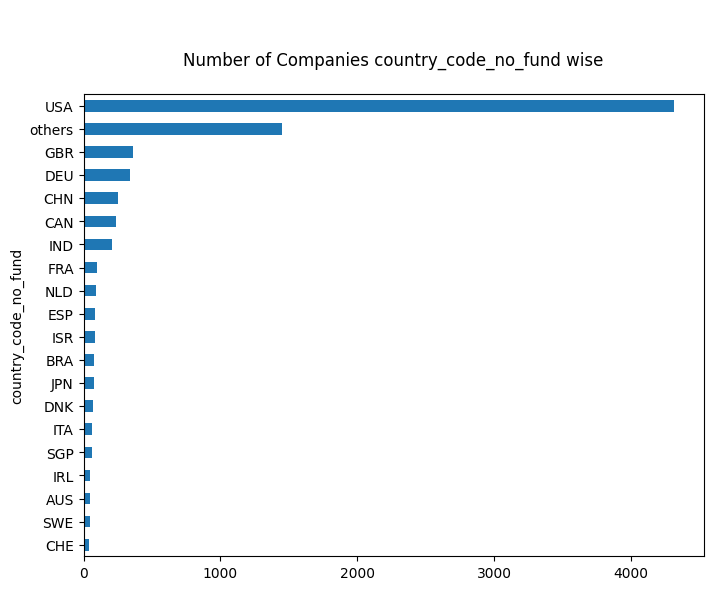

In [ ]:
get_column_details(df_no_fund,column='country_code_no_fund',plot_size=(8,6),plt_req='barh',a=20)

Details of country_code_fund column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  111
**************************************************

Count of Companies country_code_fund wise:

country_code_fund
USA       24477
others     3819
GBR        2284
CAN        1165
CHN         988
          ...  
CIV           1
SOM           1
MKD           1
SYC           1
MAF           1
Name: count, Length: 111, dtype: int64
**************************************************

Percentage of companies country_code_fund wise:

country_code_fund
USA       59.84
others     9.34
GBR        5.58
CAN        2.85
CHN        2.42
          ...  
CIV        0.00
SOM        0.00
MKD        0.00
SYC        0.00
MAF        0.00
Name: proportion, Length: 111, dtype: float64
**************************************************


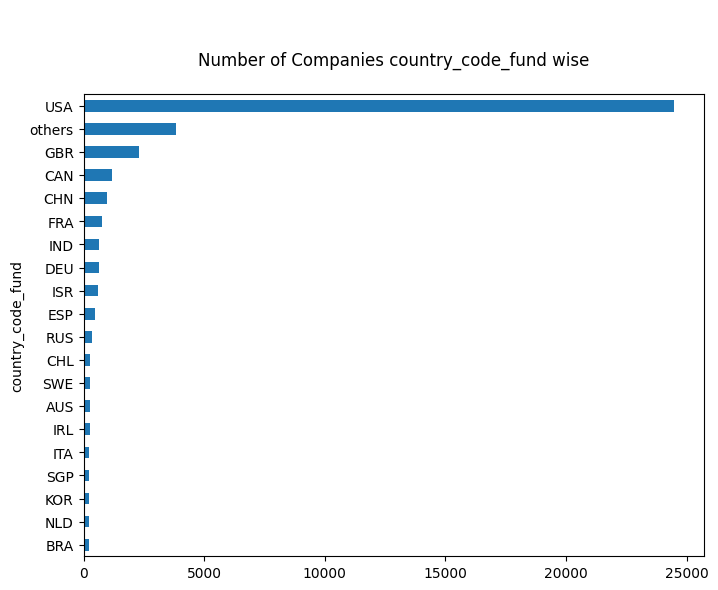

In [ ]:
get_column_details(df_fund,column='country_code_fund',plot_size=(8,6),plt_req='barh',a=20)


Details of state_code column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  62
**************************************************

Count of Companies state_code wise:

state_code
others    19269
CA         9917
NY         2914
MA         1969
TX         1466
          ...  
MB           13
AK           12
NB            8
SK            4
PE            2
Name: count, Length: 62, dtype: int64
**************************************************

Percentage of companies state_code wise:

state_code
others    38.98
CA        20.06
NY         5.90
MA         3.98
TX         2.97
          ...  
MB         0.03
AK         0.02
NB         0.02
SK         0.01
PE         0.00
Name: proportion, Length: 62, dtype: float64
**************************************************


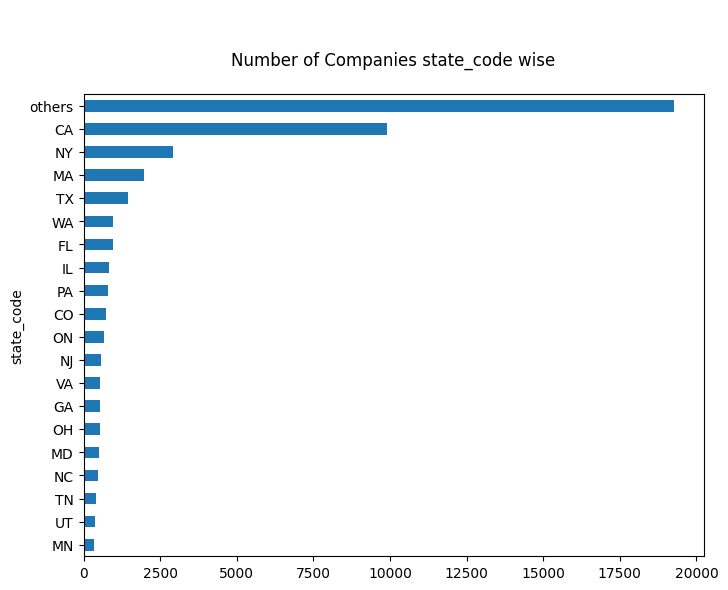

In [ ]:
get_column_details(df,column='state_code',plot_size=(8,6),plt_req='barh',a=20)

Details of state_code_no_fund column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  61
**************************************************

Count of Companies state_code_no_fund wise:

state_code_no_fund
others    3981
CA        1298
NY         422
TX         234
FL         224
          ... 
MB           3
ND           3
ME           2
SK           2
NB           1
Name: count, Length: 61, dtype: int64
**************************************************

Percentage of companies state_code_no_fund wise:

state_code_no_fund
others    46.71
CA        15.23
NY         4.95
TX         2.75
FL         2.63
          ...  
MB         0.04
ND         0.04
ME         0.02
SK         0.02
NB         0.01
Name: proportion, Length: 61, dtype: float64
**************************************************


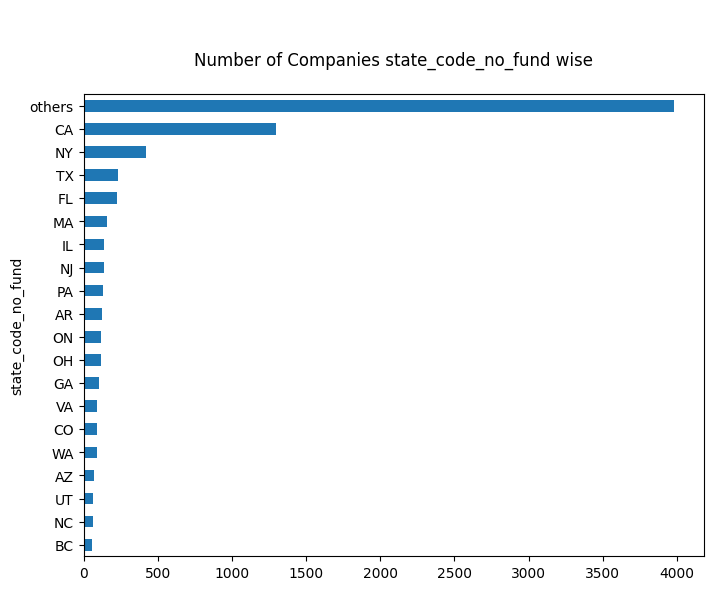

In [ ]:
get_column_details(df_no_fund,column='state_code_no_fund',plot_size=(8,6),plt_req='barh',a=20)

Details of state_code_fund column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  62
**************************************************

Count of Companies state_code_fund wise:

state_code_fund
others    15288
CA         8619
NY         2492
MA         1812
TX         1232
          ...  
AK            9
SD            9
NB            7
SK            2
PE            2
Name: count, Length: 62, dtype: int64
**************************************************

Percentage of companies state_code_fund wise:

state_code_fund
others    37.37
CA        21.07
NY         6.09
MA         4.43
TX         3.01
          ...  
AK         0.02
SD         0.02
NB         0.02
SK         0.00
PE         0.00
Name: proportion, Length: 62, dtype: float64
**************************************************


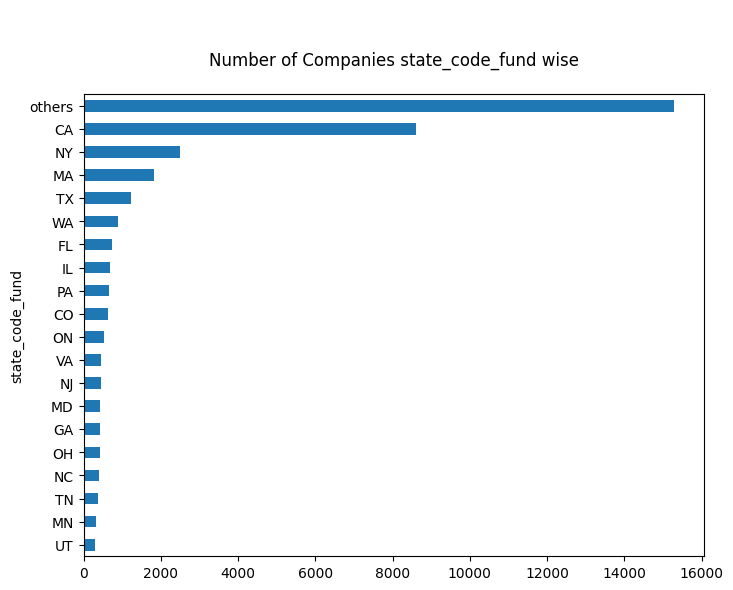

In [ ]:
get_column_details(df_fund,column='state_code_fund',plot_size=(8,6),plt_req='barh',a=20)


Details of region column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  1090
**************************************************

Count of Companies region wise:

region
SF Bay Area        6804
others             5269
New York City      2577
Boston             1837
London             1588
                   ... 
Palma Del Río         1
Harbin                1
Teddington            1
Borehamwood           1
Buckinghamshire       1
Name: count, Length: 1090, dtype: int64
**************************************************

Percentage of companies region wise:

region
SF Bay Area        13.76
others             10.66
New York City       5.21
Boston              3.72
London              3.21
                   ...  
Palma Del Río       0.00
Harbin              0.00
Teddington          0.00
Borehamwood         0.00
Buckinghamshire     0.00
Name: proportion, Length: 1090, dtype: float64
*******

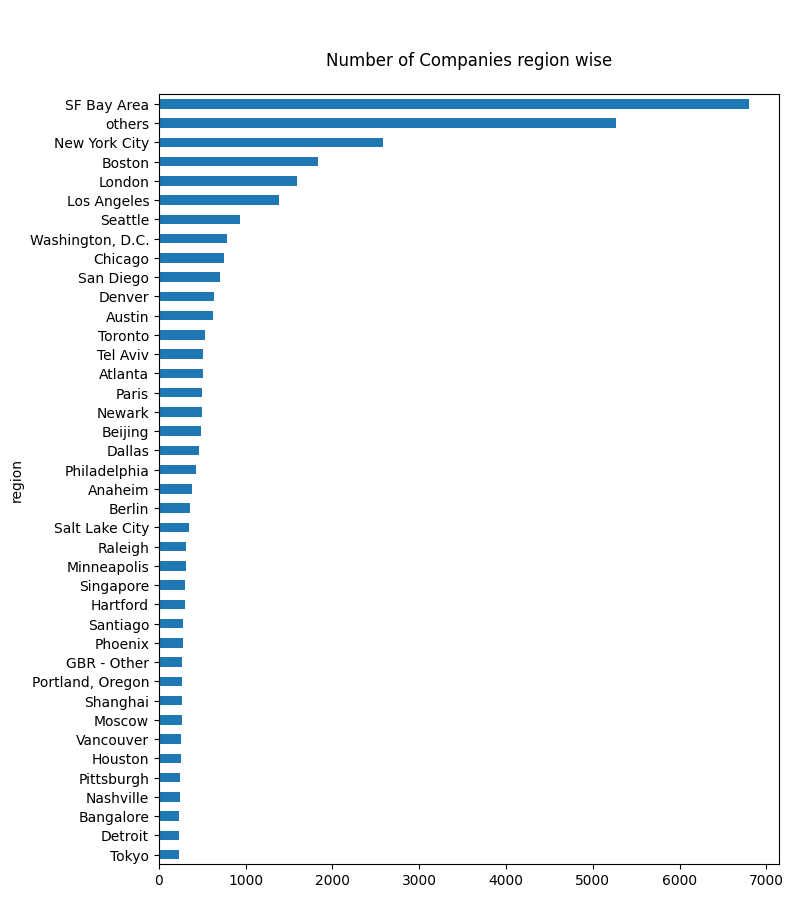

In [ ]:
get_column_details(df,column='region',plot_size=(8,10),plt_req='barh',a=40)

Details of region_no_fund column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  627
**************************************************

Count of Companies region_no_fund wise:

region_no_fund
others                1450
SF Bay Area            810
New York City          349
Los Angeles            249
London                 233
                      ... 
Tralee                   1
Halle An Der Saale       1
SAU - Other              1
Wolverhampton            1
Muenchen                 1
Name: count, Length: 627, dtype: int64
**************************************************

Percentage of companies region_no_fund wise:

region_no_fund
others                17.01
SF Bay Area            9.50
New York City          4.09
Los Angeles            2.92
London                 2.73
                      ...  
Tralee                 0.01
Halle An Der Saale     0.01
SAU - Other            0.01
Wolver

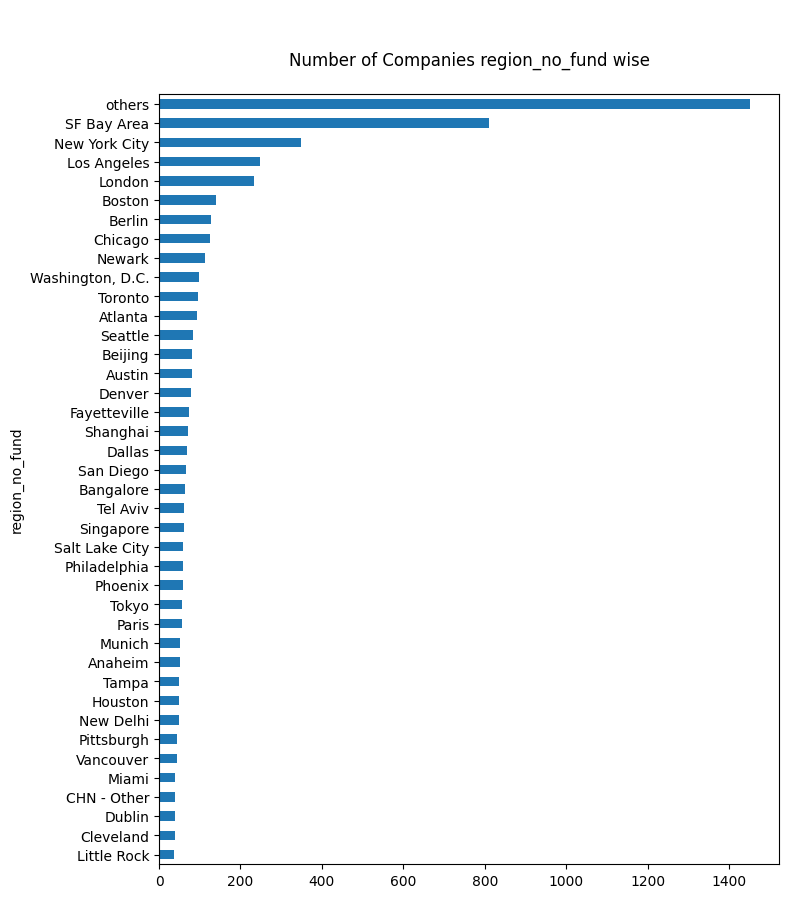

In [ ]:
get_column_details(df_no_fund,column='region_no_fund',plot_size=(8,10),plt_req='barh',a=40)

Details of region_fund column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  1032
**************************************************

Count of Companies region_fund wise:

region_fund
SF Bay Area        5994
others             3819
New York City      2228
Boston             1697
London             1355
                   ... 
Lachine               1
SAU - Other           1
Paisley               1
Guwahati              1
Buckinghamshire       1
Name: count, Length: 1032, dtype: int64
**************************************************

Percentage of companies region_fund wise:

region_fund
SF Bay Area        14.65
others              9.34
New York City       5.45
Boston              4.15
London              3.31
                   ...  
Lachine             0.00
SAU - Other         0.00
Paisley             0.00
Guwahati            0.00
Buckinghamshire     0.00
Name: proportion, Length: 103

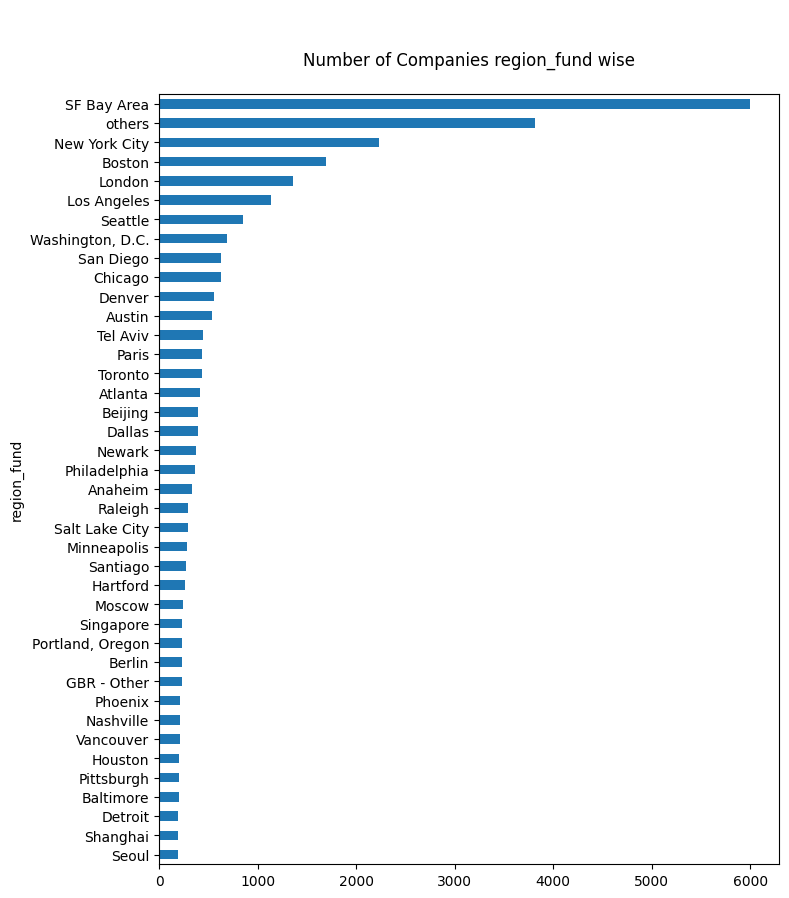

In [ ]:
get_column_details(df_fund,column='region_fund',plot_size=(8,10),plt_req='barh',a=40)


Details of city column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  4189
**************************************************

Count of Companies city wise:

city
others                   6112
San Francisco            2615
New York                 2334
London                   1257
Palo Alto                 597
                         ... 
Pekin                       1
Fort Ripley                 1
Chelyabinsk-40              1
Yavneh                      1
Damansara New Village       1
Name: count, Length: 4189, dtype: int64
**************************************************

Percentage of companies city wise:

city
others                   12.36
San Francisco             5.29
New York                  4.72
London                    2.54
Palo Alto                 1.21
                         ...  
Pekin                     0.00
Fort Ripley               0.00
Chelyabinsk-40           

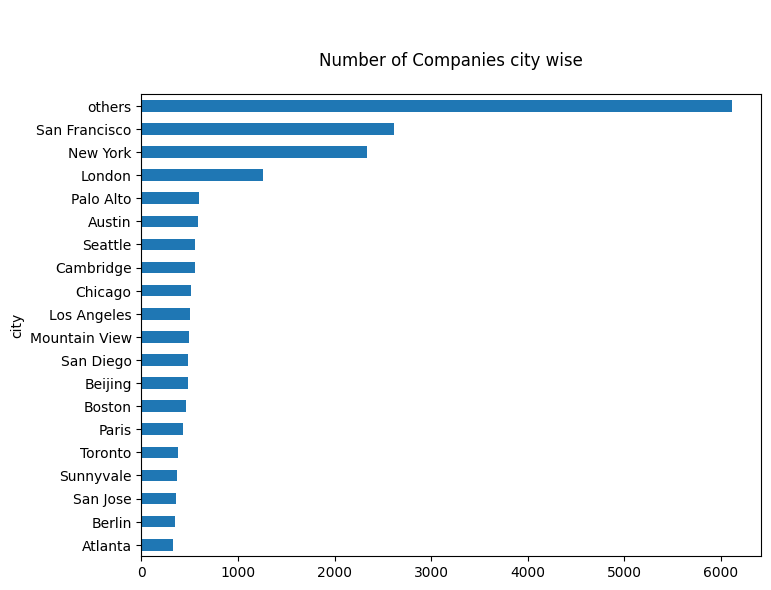

In [ ]:
get_column_details(df,column='city',plot_size=(8,6),plt_req='barh',a=20)


Details of city_no_fund column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  1827
**************************************************

Count of Companies city_no_fund wise:

city_no_fund
others           1607
San Francisco     342
New York          310
London            203
Berlin            123
                 ... 
Coppell             1
Glencoe             1
Las Cruces          1
Creswell            1
Zwolle              1
Name: count, Length: 1827, dtype: int64
**************************************************

Percentage of companies city_no_fund wise:

city_no_fund
others           18.85
San Francisco     4.01
New York          3.64
London            2.38
Berlin            1.44
                 ...  
Coppell           0.01
Glencoe           0.01
Las Cruces        0.01
Creswell          0.01
Zwolle            0.01
Name: proportion, Length: 1827, dtype: float64
*********************

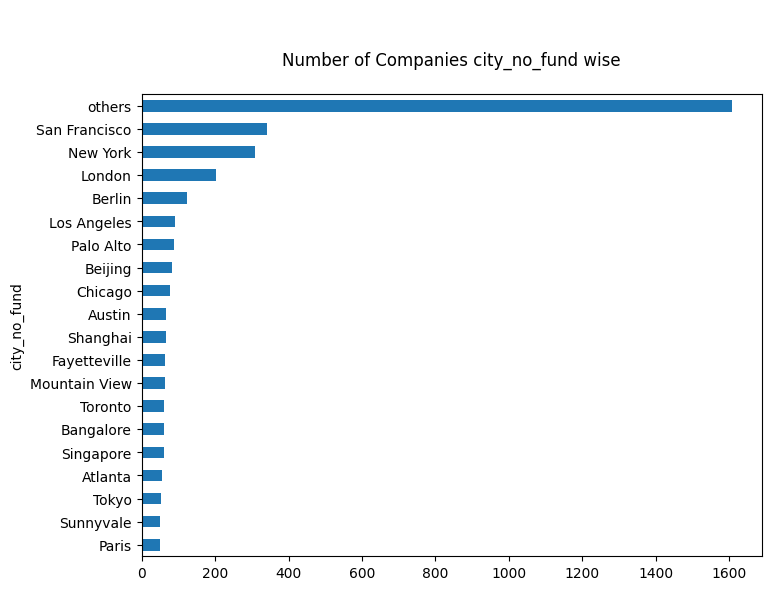

In [ ]:
get_column_details(df_no_fund,column='city_no_fund',plot_size=(8,6),plt_req='barh',a=20)

Details of city_fund column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  3587
**************************************************

Count of Companies city_fund wise:

city_fund
others                   4505
San Francisco            2273
New York                 2024
London                   1054
Austin                    516
                         ... 
West End                    1
Ronkonkoma                  1
Uzerche                     1
Trois-rivières              1
Damansara New Village       1
Name: count, Length: 3587, dtype: int64
**************************************************

Percentage of companies city_fund wise:

city_fund
others                   11.01
San Francisco             5.56
New York                  4.95
London                    2.58
Austin                    1.26
                         ...  
West End                  0.00
Ronkonkoma                0.00


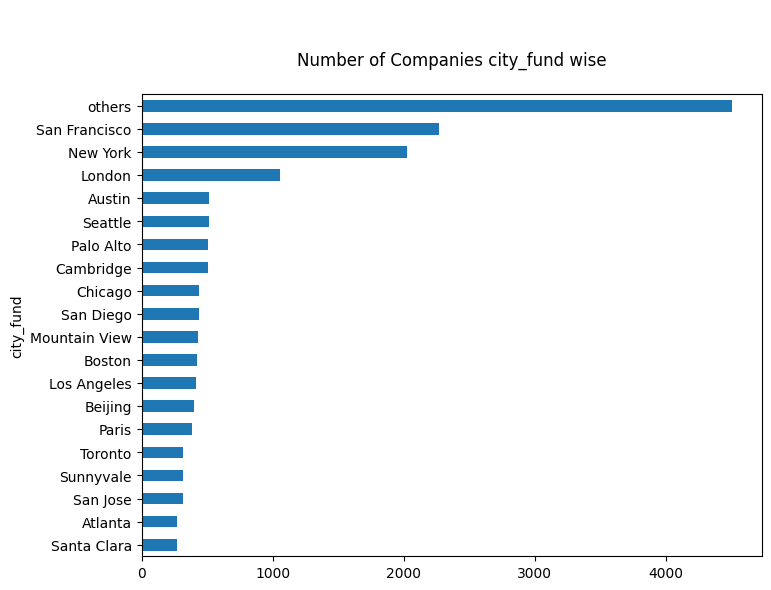

In [ ]:
get_column_details(df_fund,column='city_fund',plot_size=(8,6),plt_req='barh',a=20)


Details of category_list column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  824
**************************************************

Count of Companies category_list wise:

category_list
Software                    6881
Mobile                      4430
Biotechnology               4005
unknown                     3960
E-Commerce                  3238
                            ... 
Shipping Broker Industry       1
Motors                         1
Content Summarization          1
Real                           1
Clean Technology IT            1
Name: count, Length: 824, dtype: int64
**************************************************

Percentage of companies category_list wise:

category_list
Software                    6.65
Mobile                      4.28
Biotechnology               3.87
unknown                     3.83
E-Commerce                  3.13
                            ... 

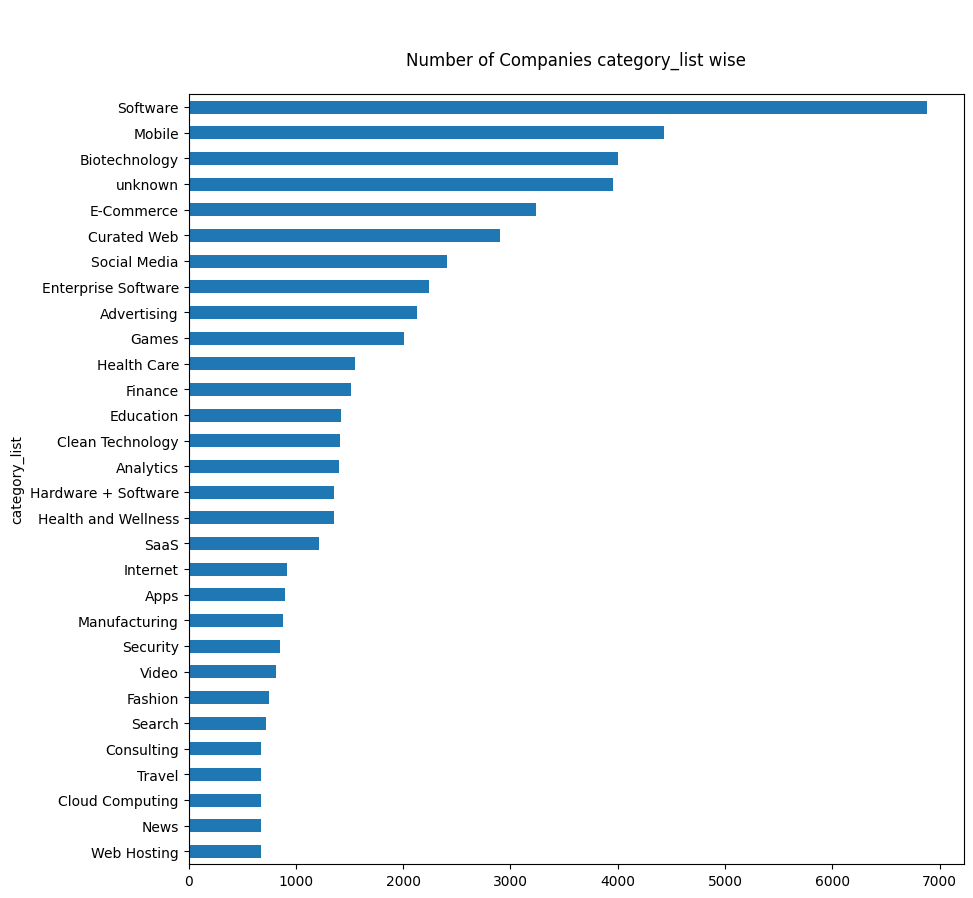

name  category_list   market  funding_total_usd     status  \
0            #waywire  Entertainment    News                17.5   acquired   
0            #waywire       Politics    News                17.5   acquired   
0            #waywire   Social Media    News                17.5   acquired   
0            #waywire           News    News                17.5   acquired   
1  &TV Communications          Games   Games                40.0  operating   

  country_code state_code         region         city  funding_rounds  ...  \
0          USA         NY  New York City     New York             1.0  ...   
0          USA         NY  New York City     New York             1.0  ...   
0          USA         NY  New York City     New York             1.0  ...   
0          USA         NY  New York City     New York             1.0  ...   
1          USA         CA    Los Angeles  Los Angeles             2.0  ...   

  secondary_market  product_crowdfunding  round_A  round_B round_C round_D  \
0              0.0                   0.0      0.0      0.0     0.0     0.0   
0              0.0                   0.0      0.0      0.0     0.0     0.0   
0              0.0                   0.0      0.0      0.0     0.0     0.0   
0              0.0                   0.0      0.0      0.0     0.0     0.0   
1              0.0                   0.0      0.0      0.0     0.0     0.0   

   round_E  round_F  round_G  round_H  
0      0.0      0.0      0.0      0.0  
0      0.0      0.0      0.0      0.0  
0      0.0      0.0      0.0      0.0  
0      0.0      0.0      0.0      0.0  
1      0.0      0.0      0.0      0.0  

[5 rows x 37 columns]

In [ ]:
df_1=df.explode('category_list')
get_column_details(df_1,column='category_list',plot_size=(10,10),plt_req='barh',a=30)
df_1.head()

Details of category_list_no_fund column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  687
**************************************************

Count of Companies category_list_no_fund wise:

category_list_no_fund
unknown                   1457
Software                   888
Mobile                     600
E-Commerce                 574
Curated Web                512
                          ... 
Comics                       1
Edutainment                  1
Contact Centers              1
Low Bid Auctions             1
Data Center Automation       1
Name: count, Length: 687, dtype: int64
**************************************************

Percentage of companies category_list_no_fund wise:

category_list_no_fund
unknown                   8.82
Software                  5.37
Mobile                    3.63
E-Commerce                3.47
Curated Web               3.10
                        

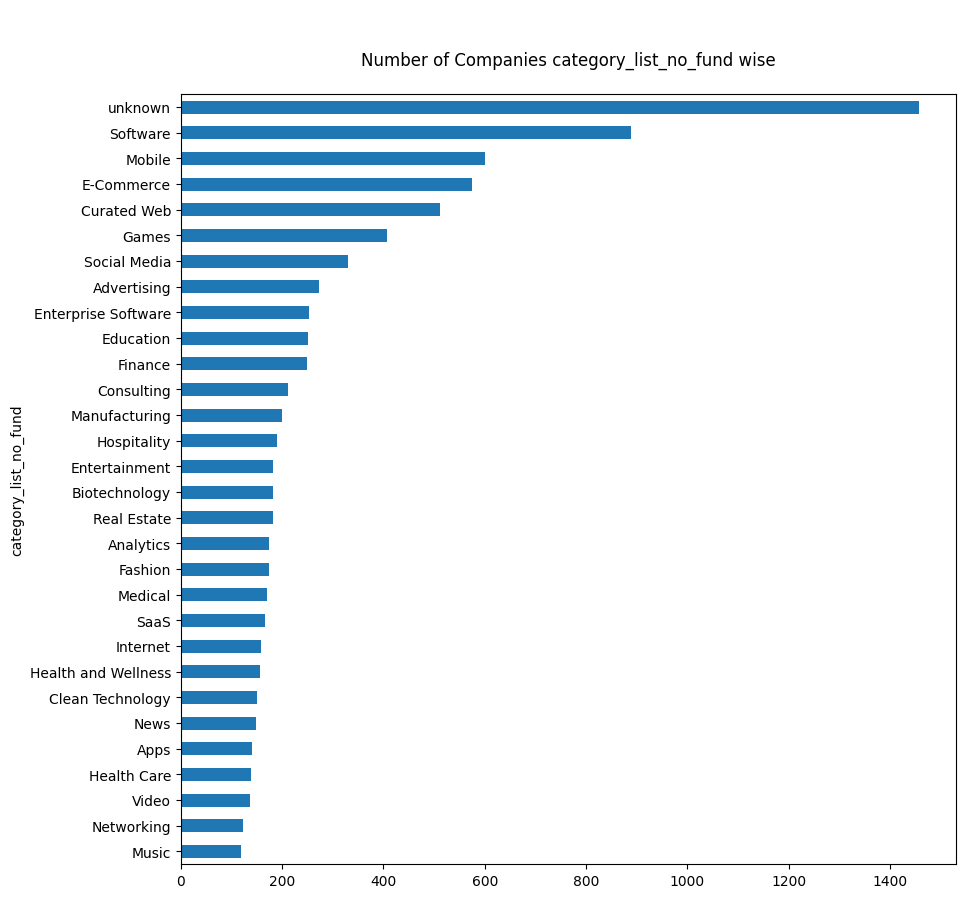

In [ ]:
df_no_fund_1=df_no_fund.explode('category_list_no_fund')
get_column_details(df_no_fund_1,column='category_list_no_fund',plot_size=(10,10),plt_req='barh',a=30)

Details of category_list_fund column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  815
**************************************************

Count of Companies category_list_fund wise:

category_list_fund
Software                          5993
Mobile                            3830
Biotechnology                     3822
E-Commerce                        2664
unknown                           2503
                                  ... 
Technical Continuing Education       1
Unmanned Air Systems                 1
Mob                                  1
English Speaking Caribbean           1
Clean Technology IT                  1
Name: count, Length: 815, dtype: int64
**************************************************

Percentage of companies category_list_fund wise:

category_list_fund
Software                          6.89
Mobile                            4.40
Biotechnology               

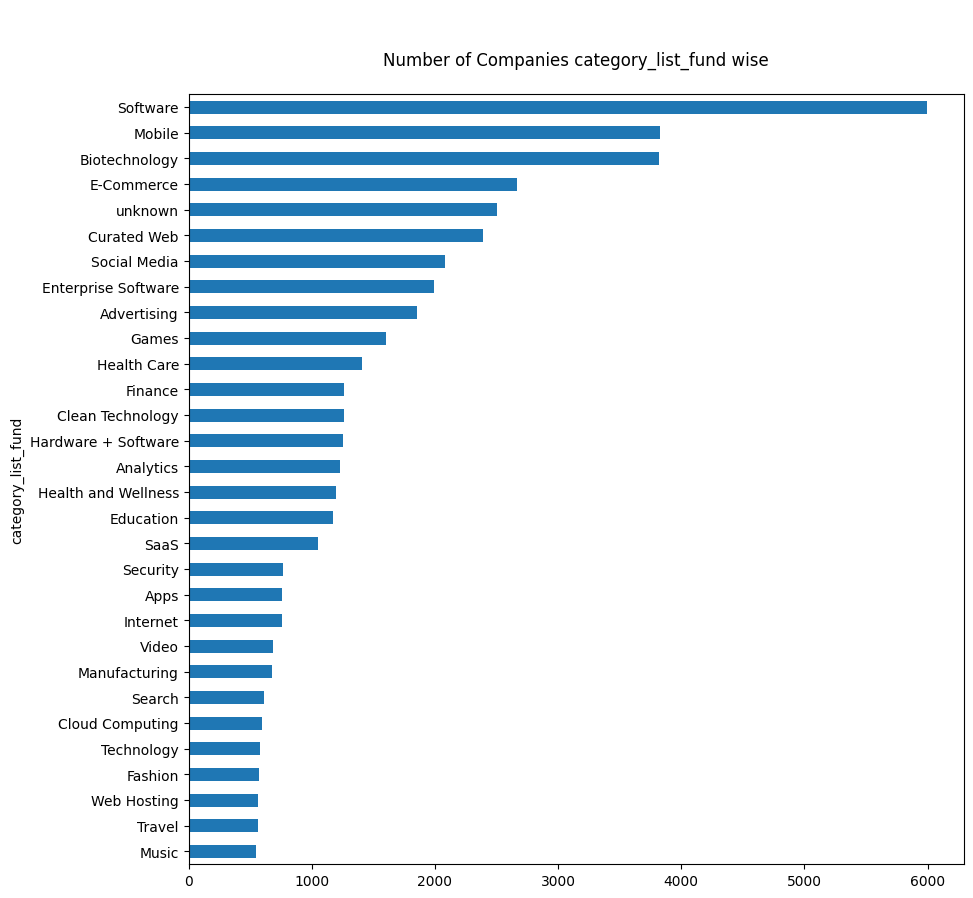

In [ ]:
df_fund_1=df_fund.explode('category_list_fund')
get_column_details(df_fund_1,column='category_list_fund',plot_size=(10,10),plt_req='barh',a=30)

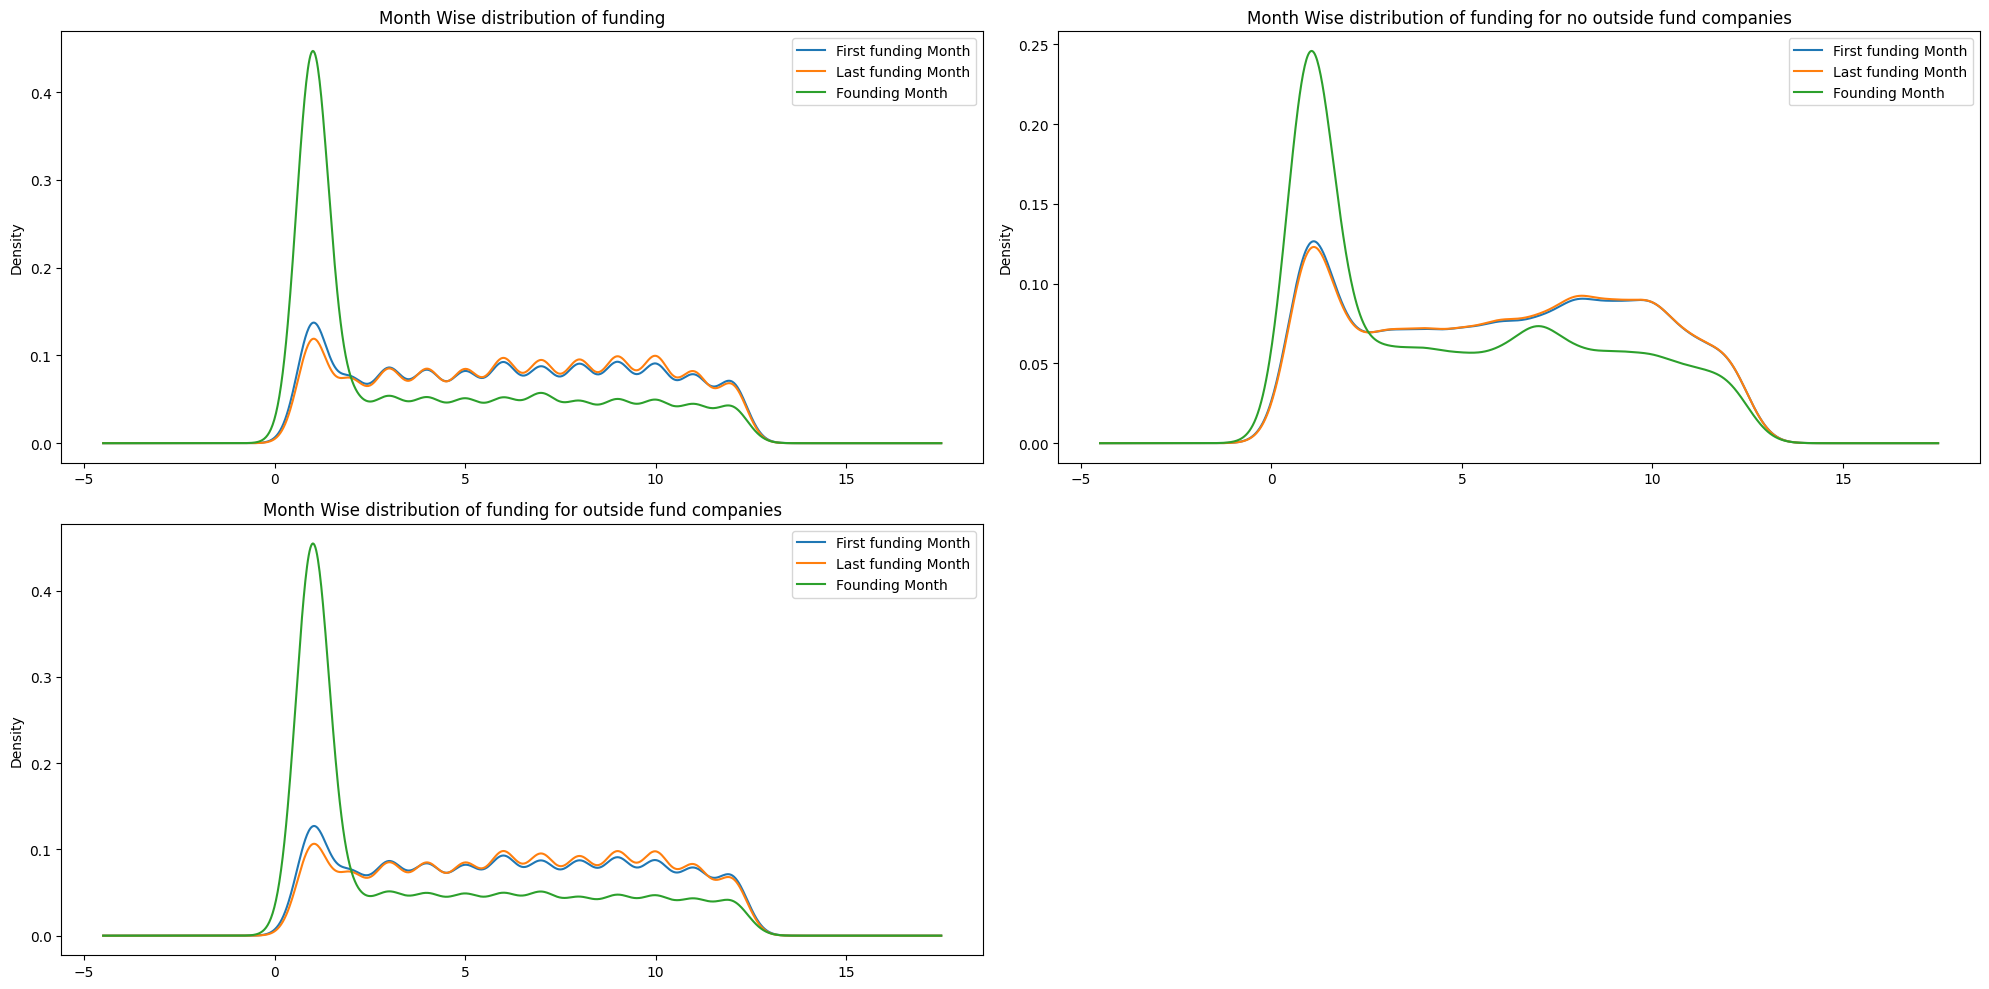

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.title('Month Wise distribution of funding')
df['first_funding_at'].dt.month.plot(kind='kde',label='First funding Month')
df['last_funding_at'].dt.month.plot(kind='kde',label='Last funding Month')
df['founded_at'].dt.month.plot(kind='kde',label='Founding Month')
plt.legend()

plt.subplot(2,2,2)
plt.title('Month Wise distribution of funding for no outside fund companies')
df_no_fund['first_funding_at_no_fund'].dt.month.plot(kind='kde',label='First funding Month')
df_no_fund['last_funding_at_no_fund'].dt.month.plot(kind='kde',label='Last funding Month')
df_no_fund['founded_at_no_fund'].dt.month.plot(kind='kde',label='Founding Month')
plt.legend()

plt.subplot(2,2,3)
plt.title('Month Wise distribution of funding for outside fund companies')
df_fund['first_funding_at_fund'].dt.month.plot(kind='kde',label='First funding Month')
df_fund['last_funding_at_fund'].dt.month.plot(kind='kde',label='Last funding Month')
df_fund['founded_at_fund'].dt.month.plot(kind='kde',label='Founding Month')
plt.legend()

plt.tight_layout()
plt.show()

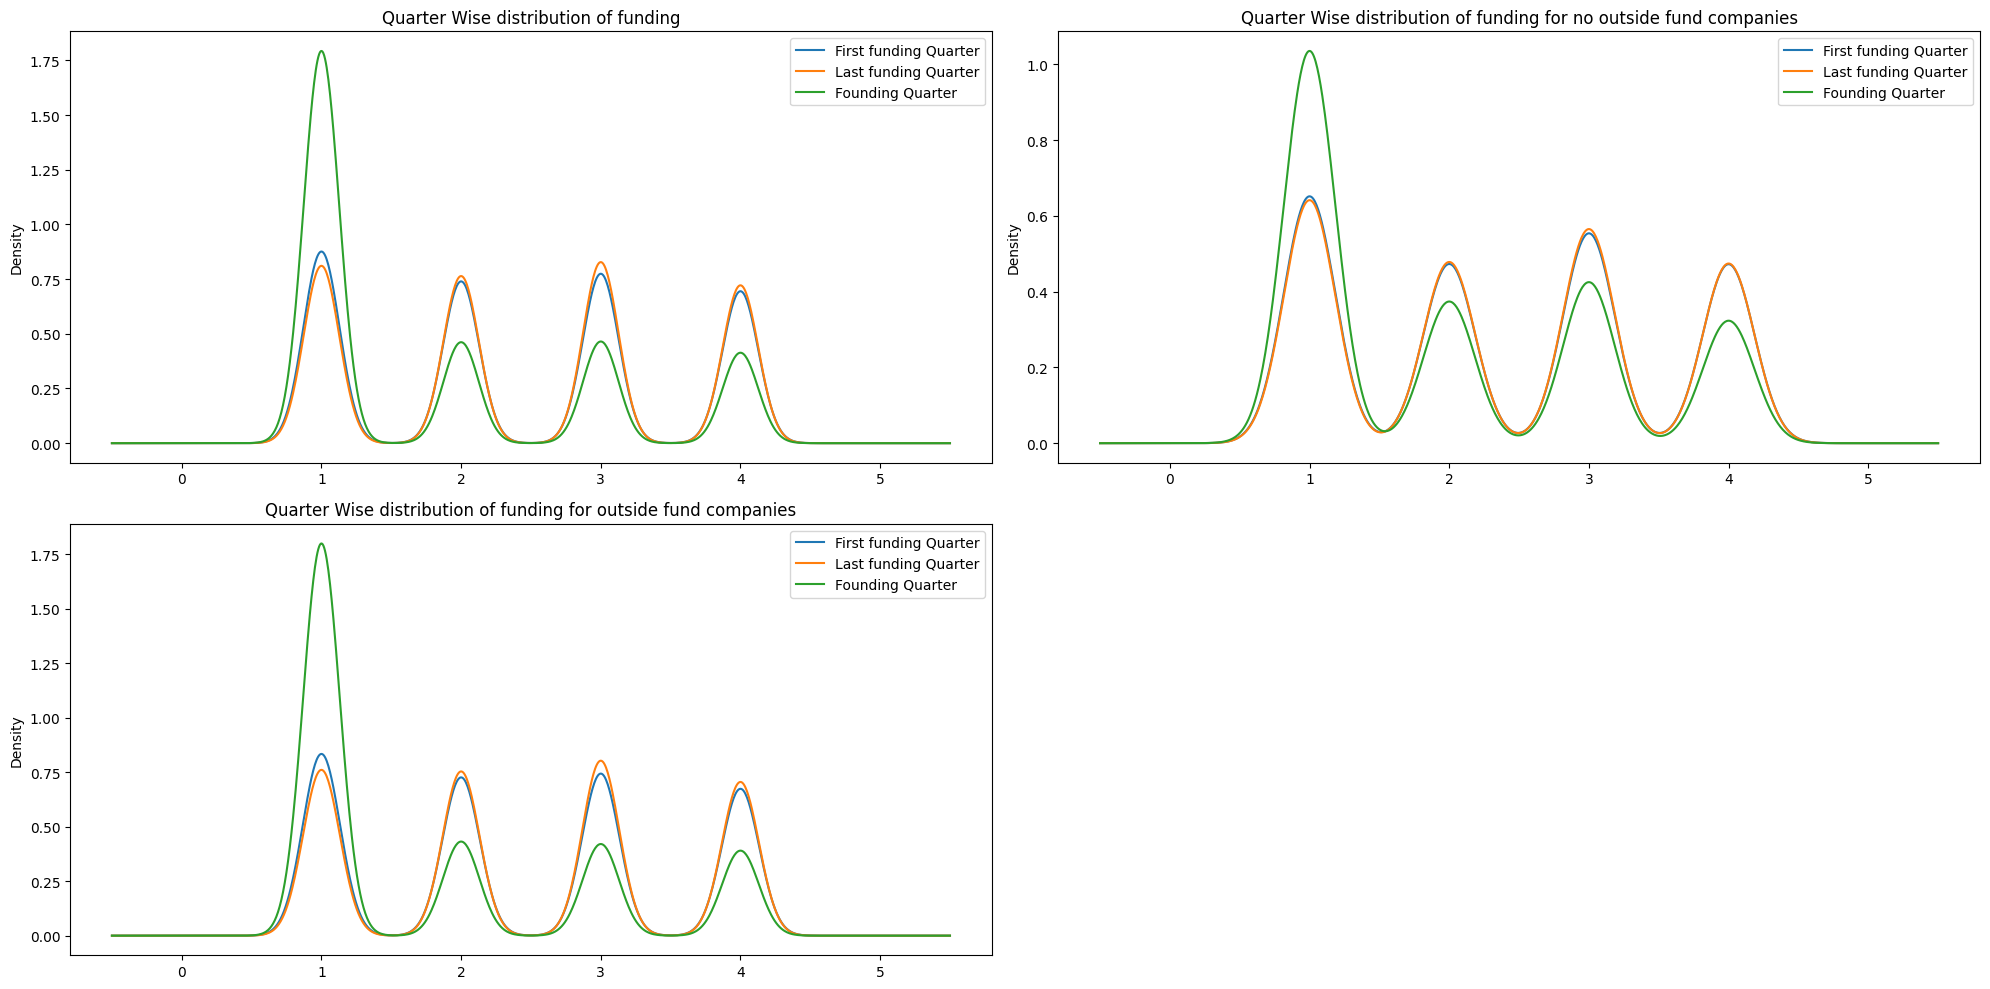

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.title('Quarter Wise distribution of funding')
df['first_funding_at'].dt.quarter.plot(kind='kde',label='First funding Quarter')
df['last_funding_at'].dt.quarter.plot(kind='kde',label ='Last funding Quarter')
df['founded_at'].dt.quarter.plot(kind='kde', label='Founding Quarter')
plt.legend()

plt.subplot(2,2,2)
plt.title('Quarter Wise distribution of funding for no outside fund companies')
df_no_fund['first_funding_at_no_fund'].dt.quarter.plot(kind='kde',label='First funding Quarter')
df_no_fund['last_funding_at_no_fund'].dt.quarter.plot(kind='kde',label ='Last funding Quarter')
df_no_fund['founded_at_no_fund'].dt.quarter.plot(kind='kde', label='Founding Quarter')
plt.legend()

plt.subplot(2,2,3)
plt.title('Quarter Wise distribution of funding for outside fund companies')
df_fund['first_funding_at_fund'].dt.quarter.plot(kind='kde',label='First funding Quarter')
df_fund['last_funding_at_fund'].dt.quarter.plot(kind='kde',label ='Last funding Quarter')
df_fund['founded_at_fund'].dt.quarter.plot(kind='kde', label='Founding Quarter')
plt.legend()

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

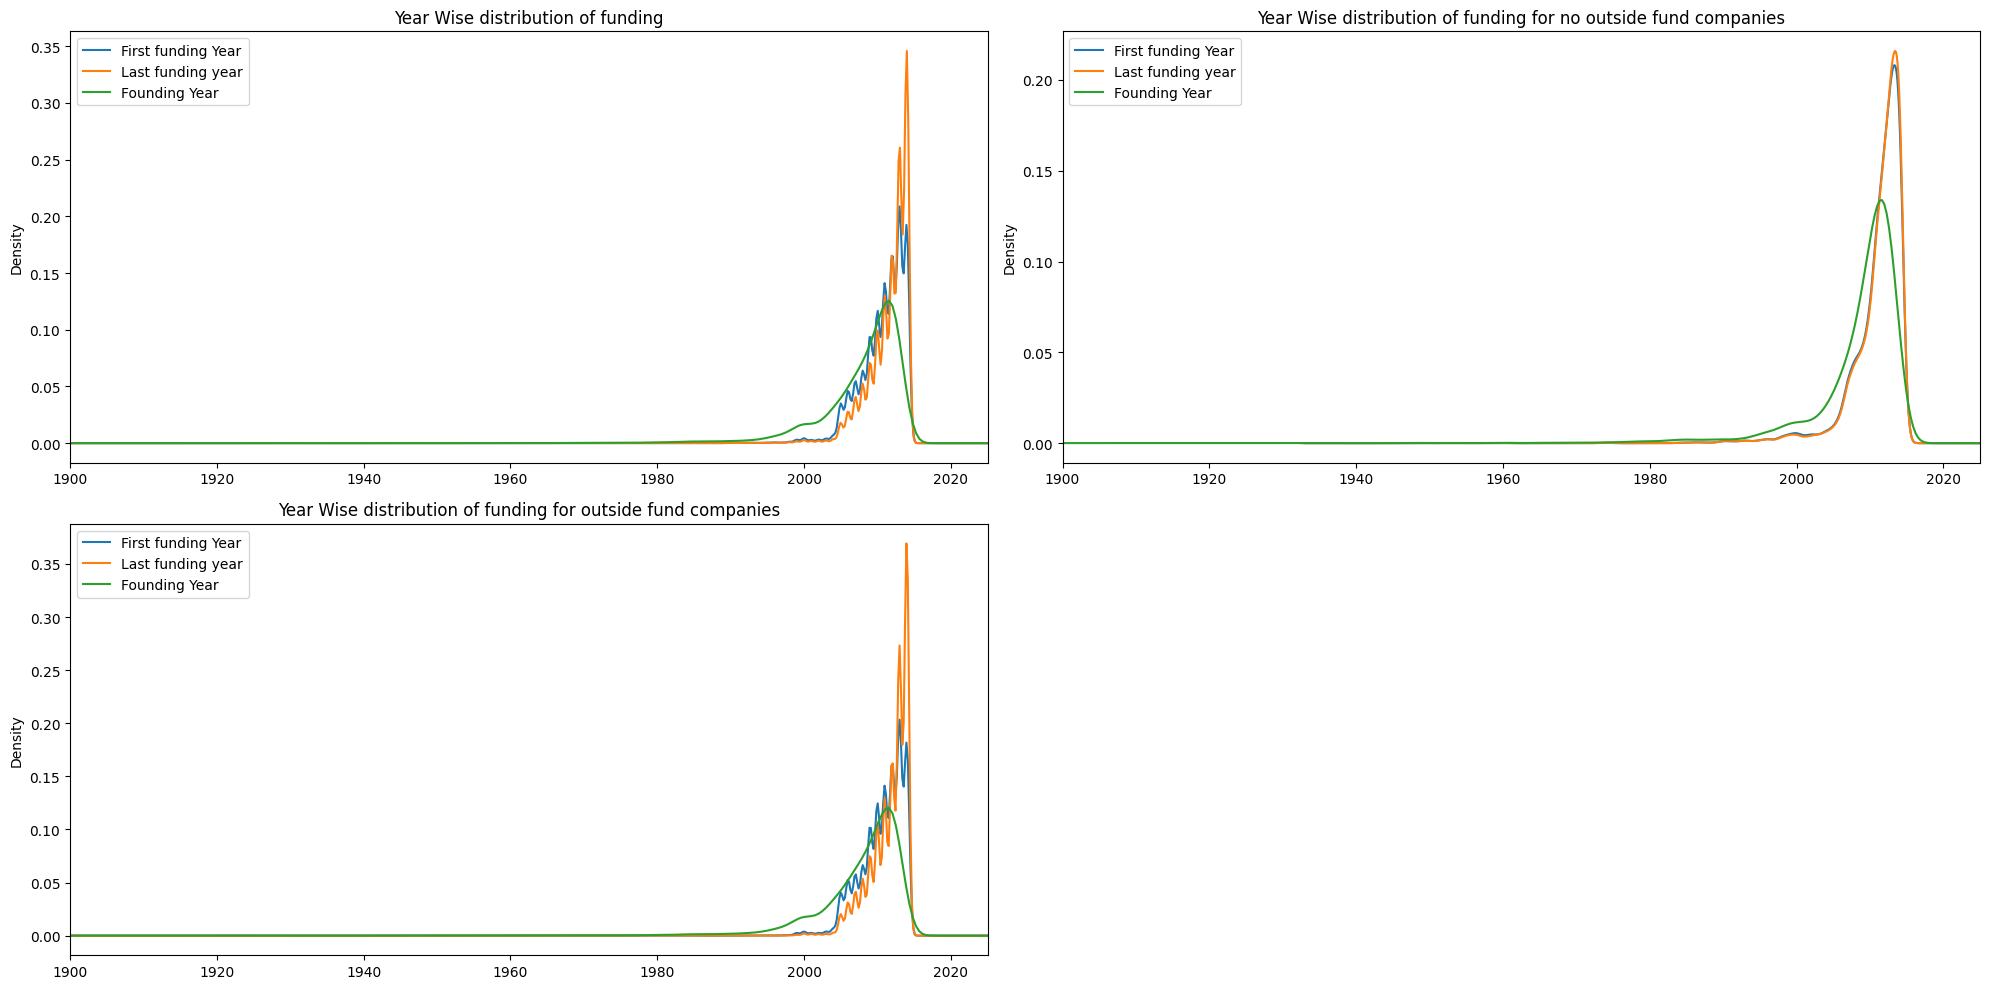

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.title('Year Wise distribution of funding')
df['first_funding_at'].dt.year.plot(kind='kde',label='First funding Year')
df['last_funding_at'].dt.year.plot(kind='kde',label ='Last funding year')
df['founded_at'].dt.year.plot(kind='kde', label='Founding Year')
plt.xlim(1900,2025)
plt.legend()

plt.subplot(2,2,2)
plt.title('Year Wise distribution of funding for no outside fund companies')
df_no_fund['first_funding_at_no_fund'].dt.year.plot(kind='kde',label='First funding Year')
df_no_fund['last_funding_at_no_fund'].dt.year.plot(kind='kde',label ='Last funding year')
df_no_fund['founded_at_no_fund'].dt.year.plot(kind='kde', label='Founding Year')
plt.xlim(1900,2025)
plt.legend()

plt.subplot(2,2,3)
plt.title('Year Wise distribution of funding for outside fund companies')
df_fund['first_funding_at_fund'].dt.year.plot(kind='kde',label='First funding Year')
df_fund['last_funding_at_fund'].dt.year.plot(kind='kde',label ='Last funding year')
df_fund['founded_at_fund'].dt.year.plot(kind='kde', label='Founding Year')
plt.xlim(1900,2025)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df.describe()

funding_total_usd  funding_rounds                     founded_at  \
count       49430.000000    49430.000000                          49430   
mean          131.687984        1.696257  2007-11-04 05:15:54.513453568   
min             0.000000        1.000000            1785-01-01 00:00:00   
25%             0.500000        1.000000            2006-03-16 06:00:00   
50%            10.000000        1.000000            2010-01-01 00:00:00   
75%            67.772480        2.000000            2012-01-01 00:00:00   
max        300795.030000       18.000000            2014-12-13 00:00:00   
std          1535.663483        1.294281                            NaN   

       founded_month  founded_quarter  founded_year  \
count   49430.000000     49430.000000  49430.000000   
mean        4.085292         1.839935   2007.571819   
min         1.000000         1.000000   1785.000000   
25%         1.000000         1.000000   2006.000000   
50%         2.000000         1.000000   2010.000000   
75%         7.000000         3.000000   2012.000000   
max        12.000000         4.000000   2014.000000   
std         3.694450         1.105874      8.730254   

                    first_funding_at                last_funding_at  \
count                          49430                          49430   
mean   2011-03-13 01:58:23.572729088  2012-01-19 12:35:51.697349632   
min              1921-09-01 00:00:00            1921-09-01 00:00:00   
25%              2009-08-24 00:00:00            2010-10-14 00:00:00   
50%              2011-12-12 00:00:00            2012-12-07 00:00:00   
75%              2013-08-01 00:00:00            2014-02-01 00:00:00   
max              2014-12-31 00:00:00            2015-01-01 00:00:00   
std                              NaN                            NaN   

               seed       venture  ...  secondary_market  \
count  49430.000000  49430.000000  ...      49430.000000   
mean       2.173567     75.022645  ...          0.384621   
min        0.000000      0.000000  ...          0.000000   
25%        0.000000      0.000000  ...          0.000000   
50%        0.000000      0.000000  ...          0.000000   
75%        0.250000     50.000000  ...          0.000000   
max     1300.000000  23510.000000  ...       6806.115540   
std       10.570667    284.732681  ...         38.647733   

       product_crowdfunding       round_A       round_B       round_C  \
count          49430.000000  49430.000000  49430.000000  49430.000000   
mean               0.070754     12.441563     14.931328     12.055509   
min                0.000000      0.000000      0.000000      0.000000   
25%                0.000000      0.000000      0.000000      0.000000   
50%                0.000000      0.000000      0.000000      0.000000   
75%                0.000000      0.000000      0.000000      0.000000   
max              720.000000   3190.000000   5420.000000   4900.000000   
std                4.282512     55.323990     74.732850     79.942239   

            round_D       round_E       round_F       round_G       round_H  
count  49430.000000  49430.000000  49430.000000  49430.000000  49430.000000  
mean       7.376454      3.425236      1.697967      0.576800      0.142343  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000      0.000000      0.000000  
max    12000.000000   4000.000000  10600.000000  10000.000000   6000.000000  
std       98.160080     54.073503     62.784131     52.527369     27.170851  

[8 rows x 29 columns]

In [ ]:
df_no_fund.describe()

funding_total_usd_no_fund  funding_rounds_no_fund  \
count                     8523.0             8523.000000   
mean                         0.0                1.086589   
min                          0.0                1.000000   
25%                          0.0                1.000000   
50%                          0.0                1.000000   
75%                          0.0                1.000000   
max                          0.0                6.000000   
std                          0.0                0.348008   

                  founded_at_no_fund  founded_month_no_fund  \
count                           8523            8523.000000   
mean   2008-08-17 21:29:58.099260928               4.715945   
min              1850-01-01 00:00:00               1.000000   
25%              2007-11-01 00:00:00               1.000000   
50%              2010-11-10 00:00:00               4.000000   
75%              2012-06-06 00:00:00               8.000000   
max              2014-11-21 00:00:00              12.000000   
std                              NaN               3.697385   

       founded_quarter_no_fund  founded_year_no_fund  \
count              8523.000000           8523.000000   
mean                  2.016778           2008.304470   
min                   1.000000           1850.000000   
25%                   1.000000           2007.000000   
50%                   2.000000           2010.000000   
75%                   3.000000           2012.000000   
max                   4.000000           2014.000000   
std                   1.129629              7.801718   

            first_funding_at_no_fund        last_funding_at_no_fund  
count                           8523                           8523  
mean   2011-07-01 00:39:11.847941120  2011-08-12 20:21:12.228088832  
min              1960-01-01 00:00:00            1960-01-01 00:00:00  
25%              2010-08-02 00:00:00            2010-10-01 00:00:00  
50%              2012-07-31 00:00:00            2012-08-27 00:00:00  
75%              2013-11-08 00:00:00            2013-12-02 12:00:00  
max              2014-12-20 00:00:00            2015-01-01 00:00:00  
std                              NaN                            NaN

In [ ]:
df_fund.describe()

funding_total_usd_fund  funding_rounds_fund  \
count            40907.000000         40907.000000   
mean               159.125261             1.823282   
min                  0.000010             1.000000   
25%                  3.500000             1.000000   
50%                 20.000000             1.000000   
75%                100.000000             2.000000   
max             300795.030000            18.000000   
std               1686.788002             1.380355   

                     founded_at_fund  founded_month_fund  \
count                          40907        40907.000000   
mean   2007-09-05 06:45:48.380472576            3.953895   
min              1785-01-01 00:00:00            1.000000   
25%              2006-01-01 00:00:00            1.000000   
50%              2009-11-13 00:00:00            2.000000   
75%              2012-01-01 00:00:00            7.000000   
max              2014-12-13 00:00:00           12.000000   
std                              NaN            3.680304   

       founded_quarter_fund  founded_year_fund          first_funding_at_fund  \
count          40907.000000       40907.000000                          40907   
mean               1.803090        2007.419170  2011-02-18 04:12:09.029261824   
min                1.000000        1785.000000            1921-09-01 00:00:00   
25%                1.000000        2006.000000            2009-07-01 00:00:00   
50%                1.000000        2009.000000            2011-10-11 00:00:00   
75%                3.000000        2012.000000            2013-07-02 00:00:00   
max                4.000000        2014.000000            2014-12-31 00:00:00   
std                1.097292           8.904047                            NaN   

                last_funding_at_fund     seed_fund  venture_fund  ...  \
count                          40907  40907.000000  40907.000000  ...   
mean   2012-02-21 19:02:53.808883456      2.626431     90.653662  ...   
min              1921-09-01 00:00:00      0.000000      0.000000  ...   
25%              2010-10-18 00:00:00      0.000000      0.000000  ...   
50%              2013-01-01 00:00:00      0.000000      5.950000  ...   
75%              2014-02-13 00:00:00      0.733500     70.000000  ...   
max              2014-12-31 00:00:00   1300.000000  23510.000000  ...   
std                              NaN     11.568536    310.721127  ...   

       secondary_market_fund  product_crowdfunding_fund  round_A_fund  \
count           40907.000000               40907.000000  40907.000000   
mean                0.464758                   0.085495     15.033771   
min                 0.000000                   0.000000      0.000000   
25%                 0.000000                   0.000000      0.000000   
50%                 0.000000                   0.000000      0.000000   
75%                 0.000000                   0.000000      0.000000   
max              6806.115540                 720.000000   3190.000000   
std                42.483173                   4.707428     60.493767   

       round_B_fund  round_C_fund  round_D_fund  round_E_fund  round_F_fund  \
count  40907.000000  40907.000000  40907.000000  40907.000000  40907.000000   
mean      18.042280     14.567282      8.913343      4.138886      2.051739   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max     5420.000000   4900.000000  12000.000000   4000.000000  10600.000000   
std       81.807918     87.668254    107.839201     59.415574     69.010345   

       round_G_fund  round_H_fund  
count  40907.000000  40907.000000  
mean       0.696977      0.172000  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%  

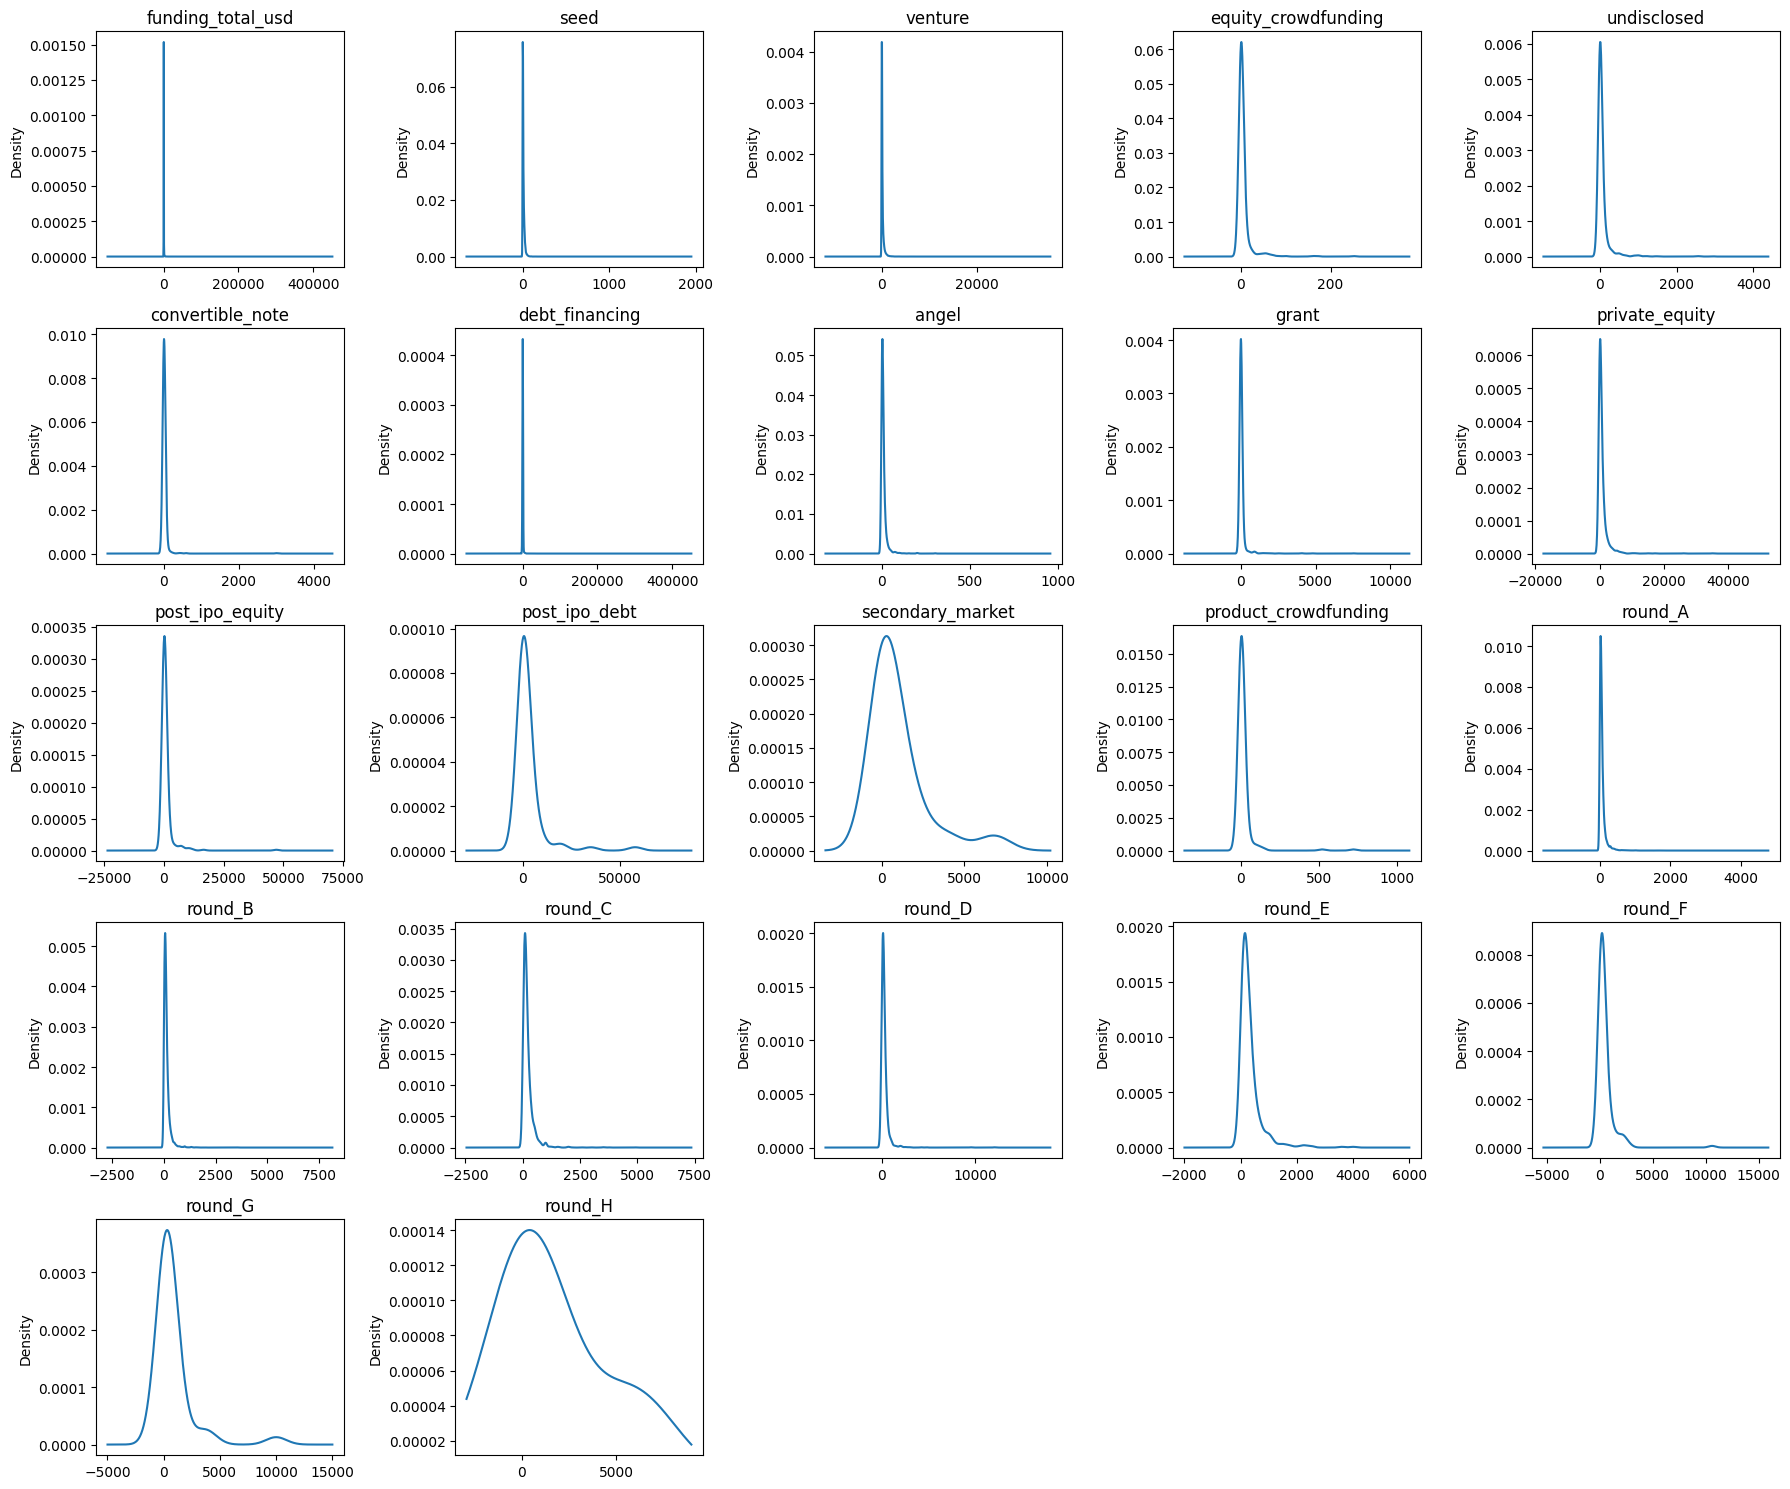

In [ ]:
plt.rcParams["figure.figsize"] = [18,15]
for i in fund_col:
  plt.subplot(5,5,fund_col.index(i)+1)
  plt.title(i)
  df[df[i]!=0][i].plot(kind='kde')
  plt.tight_layout()
plt.show()

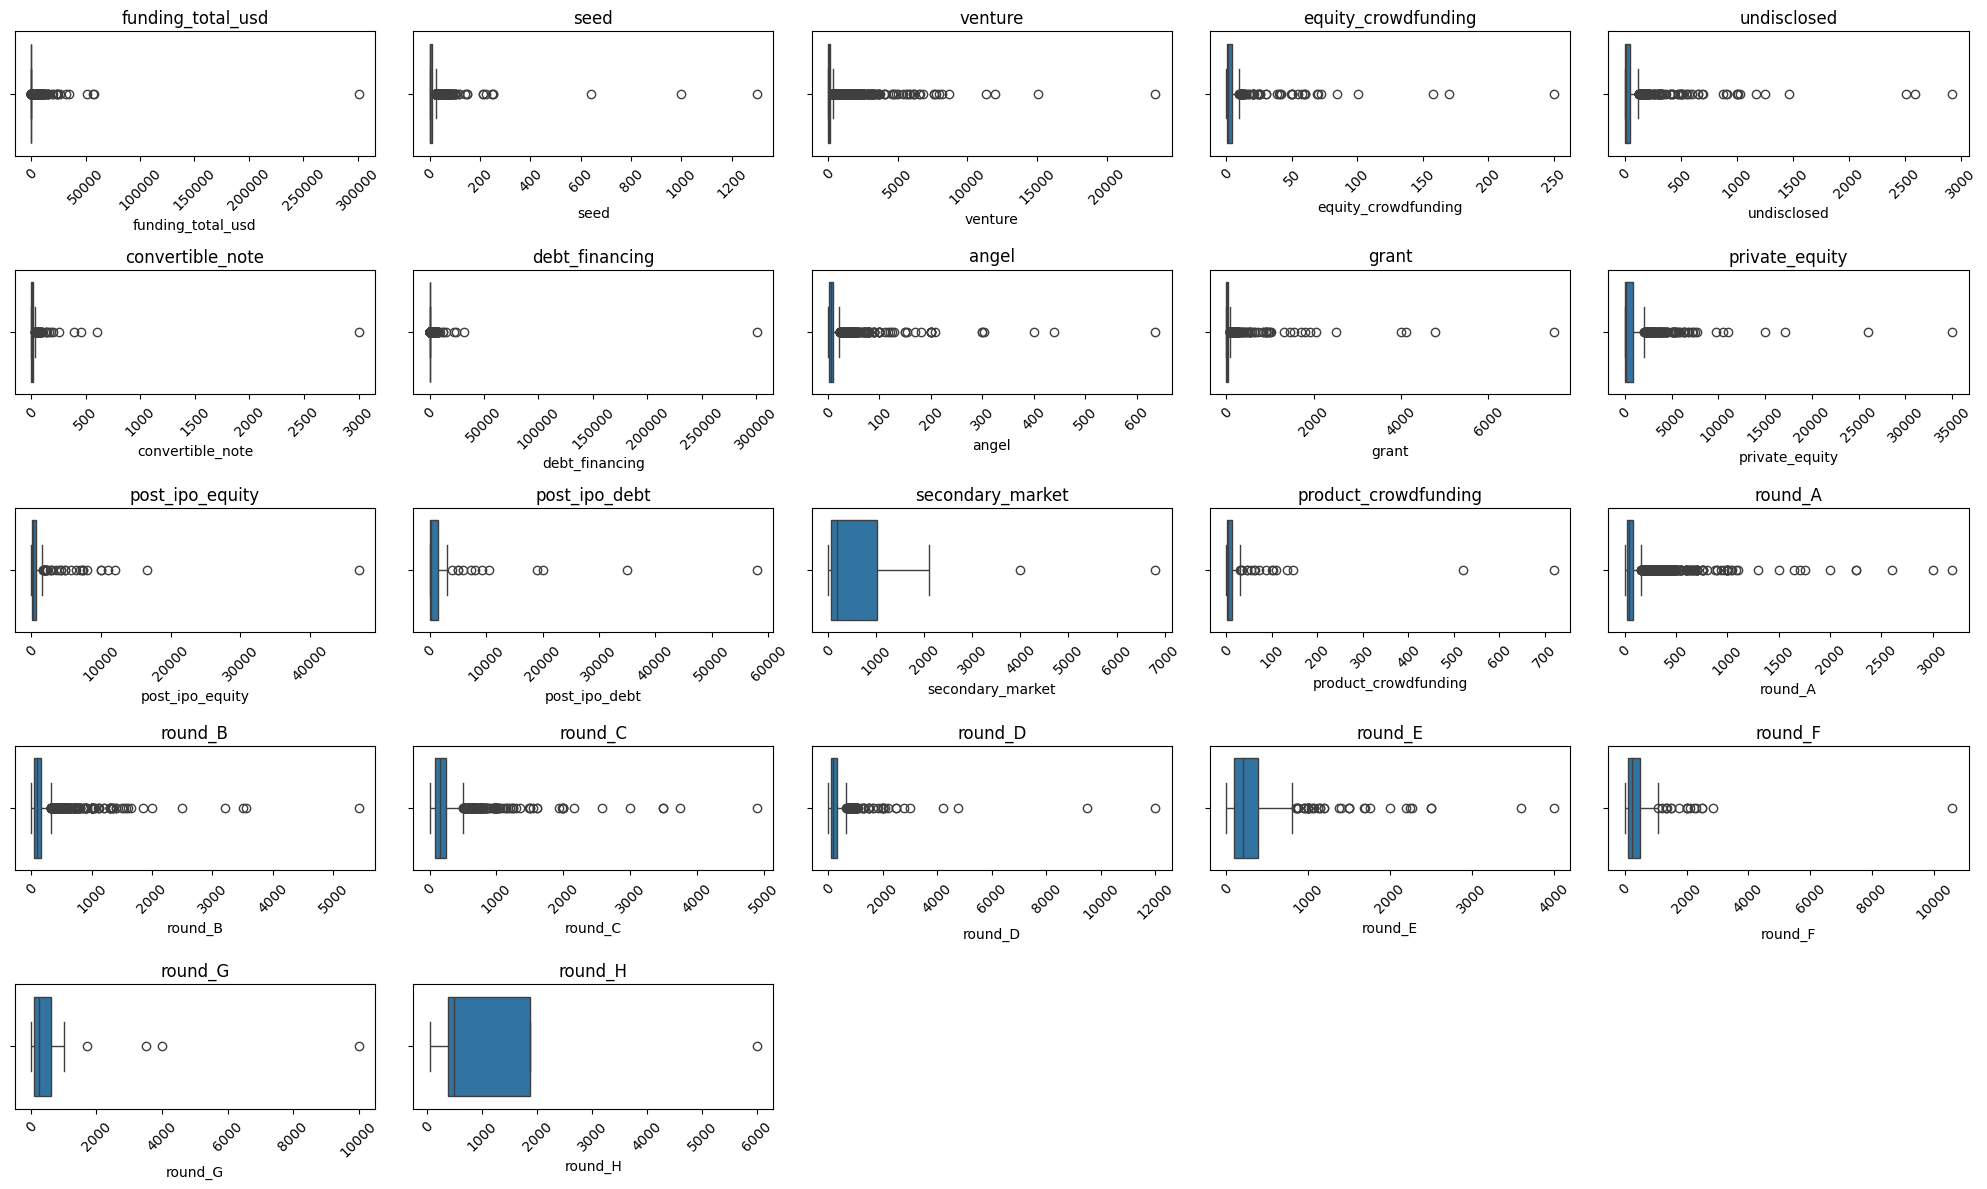

In [ ]:
plt.rcParams["figure.figsize"] = [20, 12]
for i in fund_col:
    plt.subplot(5, 5, fund_col.index(i) + 1)
    plt.title(i)

    # Plot box plot with horizontal orientation using matplotlib
    sns.boxplot(df[df[i] != 0][i], orient='h')  # vert=False makes it horizontal
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
num_col=df.select_dtypes(include='number').columns
cat_col=df.select_dtypes(exclude='number').columns

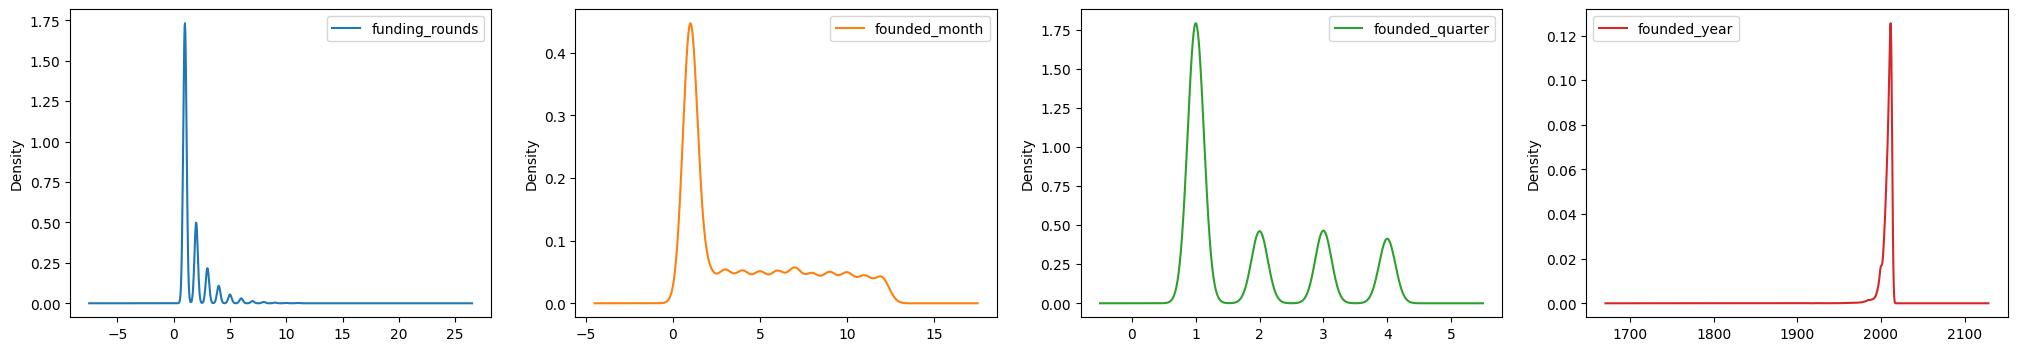

In [ ]:
plt.rcParams["figure.figsize"] = [25, 4]
df[num_col.drop(fund_col)].plot(kind='kde',layout=(1,4),subplots=True,sharex=False)
plt.show()

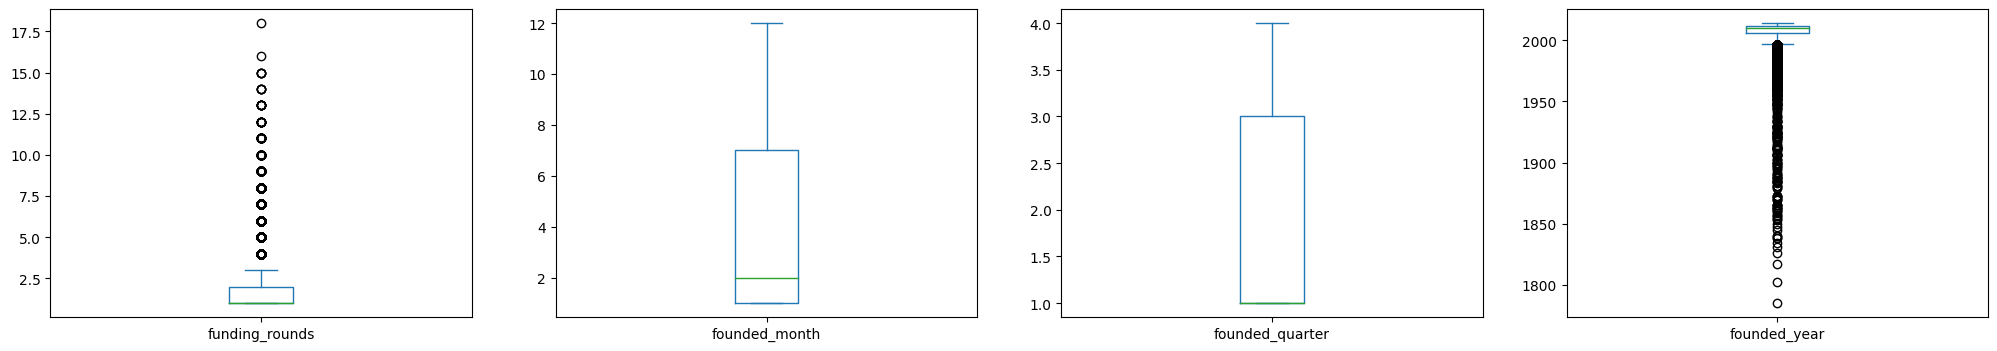

In [ ]:
plt.rcParams["figure.figsize"] = [25, 4]
df[num_col.drop(fund_col)].plot(kind='box',layout=(1,4),subplots=True,sharex=False)
plt.show()


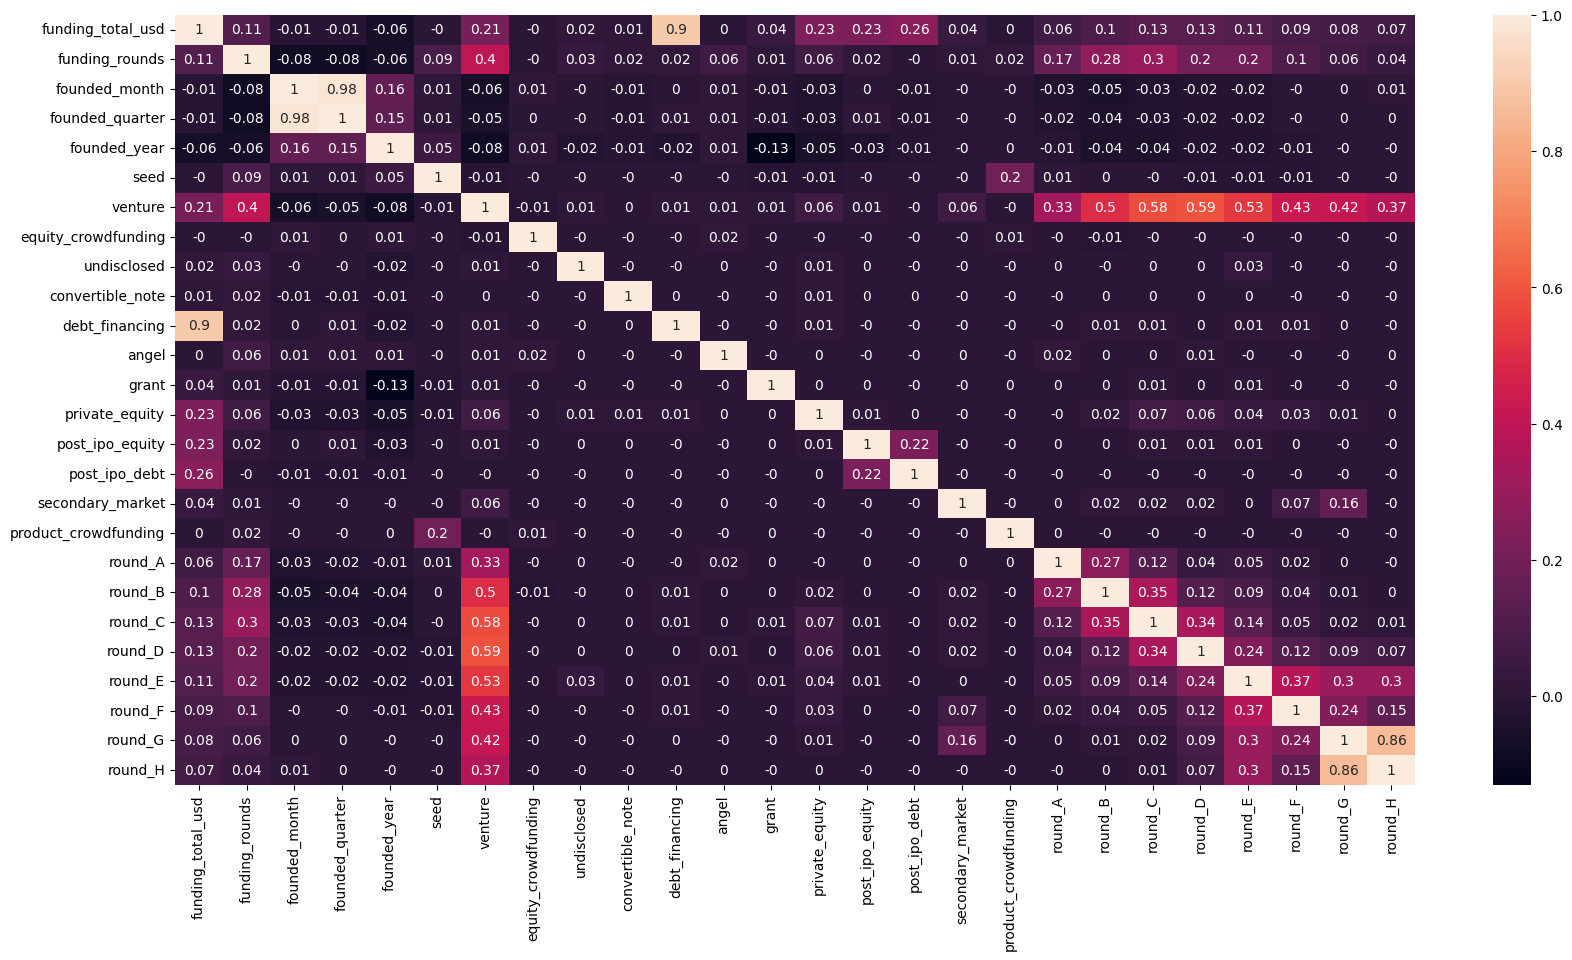

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df[num_col].corr().round(2),annot=True)
plt.show()

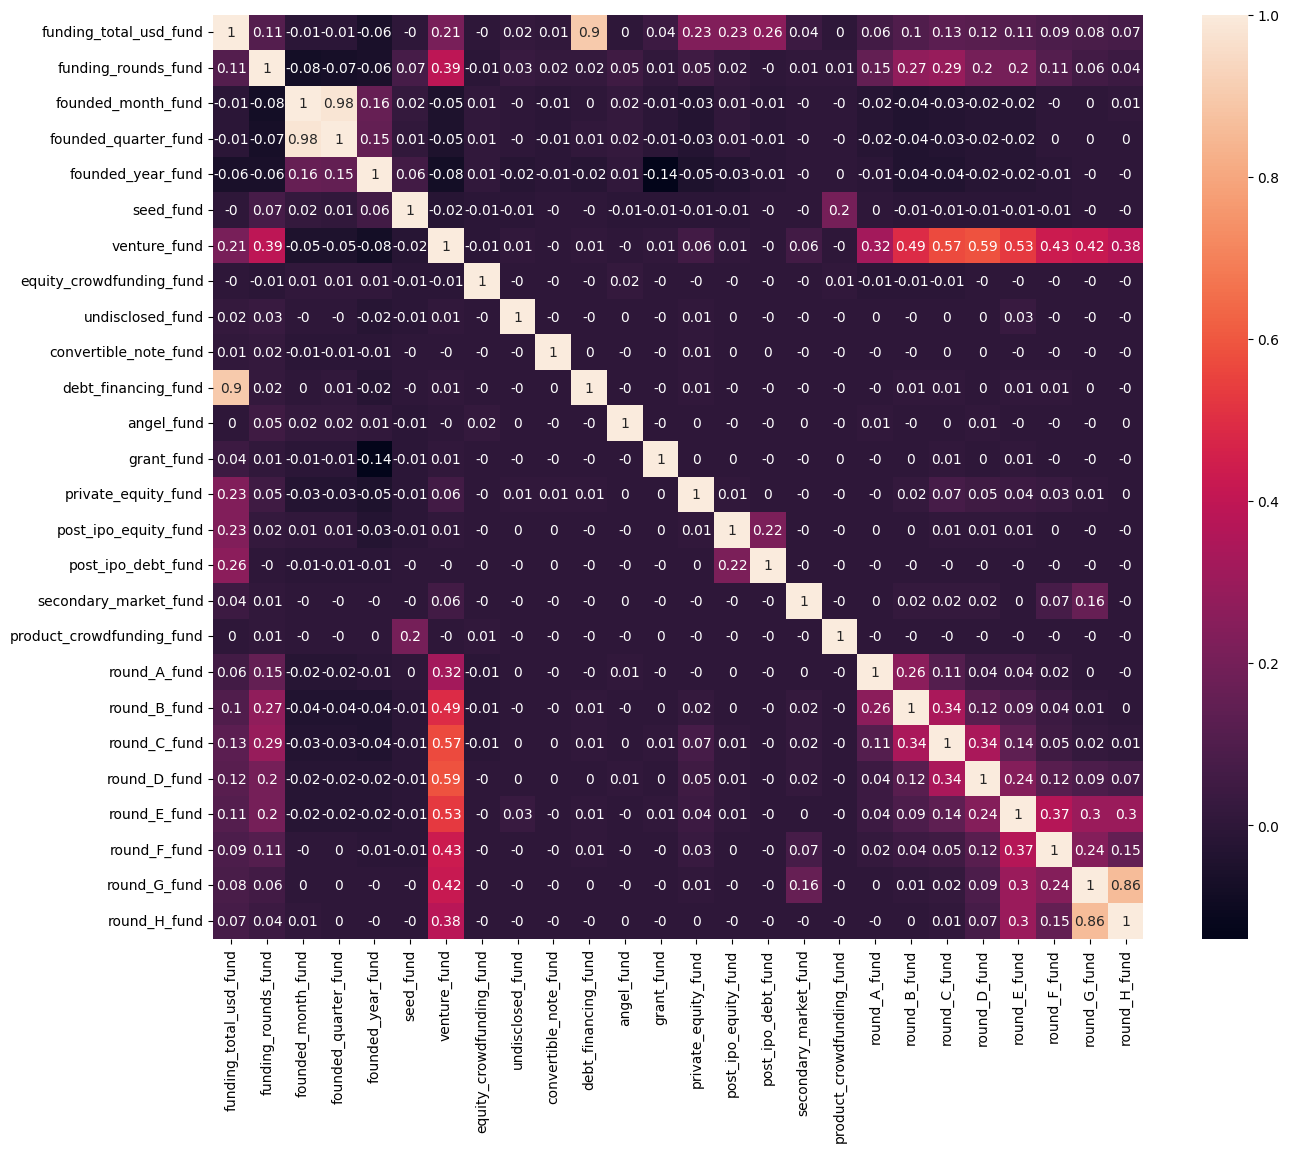

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df_fund[num_col+'_fund'].corr().round(2),annot=True)
plt.show()

In [ ]:
df['total_fund']=df.iloc[:,16:].sum(axis=1)

In [ ]:
def plot_col(df,col,plot_kind,row,a,b):

  plt.figure(figsize=(a,b))

  plt.subplot(1,2,1)
  plt.title(f'{col} wise total funding')
  (df.groupby(col)['total_fund'].sum()).sort_values(ascending=False)[:row].plot(kind=plot_kind)
  plt.gca().invert_yaxis()

  plt.subplot(1,2,2)
  plt.title(f'{col} wise average funding')
  (df.groupby(col)['total_fund'].mean()).sort_values(ascending=False)[:row].plot(kind=plot_kind)
  plt.gca().invert_yaxis()

  plt.tight_layout()
  plt.show()

In [ ]:
(df.groupby('market')['total_fund'].sum()).sort_values(ascending=False)

market
 Biotechnology                1.059347e+06
 Software                     6.049225e+05
 Mobile                       5.934725e+05
 Clean Technology             5.001892e+05
 Health Care                  4.145091e+05
                                  ...     
 Realtors                     0.000000e+00
 Performing Arts              0.000000e+00
 Independent Music Labels     0.000000e+00
 Advanced Materials           0.000000e+00
 Lasers                       0.000000e+00
Name: total_fund, Length: 759, dtype: float64

In [ ]:
(df.groupby('market')['total_fund'].mean()).sort_values(ascending=False)


market
 Natural Gas Uses             4000.000000
 B2B Express Delivery         2100.000000
 Oil and Gas                  1712.891224
 Chemicals                    1588.229002
 Trading                      1467.566414
                                 ...     
 Performing Arts                 0.000000
 Lotteries                       0.000000
 Low Bid Auctions                0.000000
 Independent Music Labels        0.000000
 Synthetic Biology               0.000000
Name: total_fund, Length: 759, dtype: float64

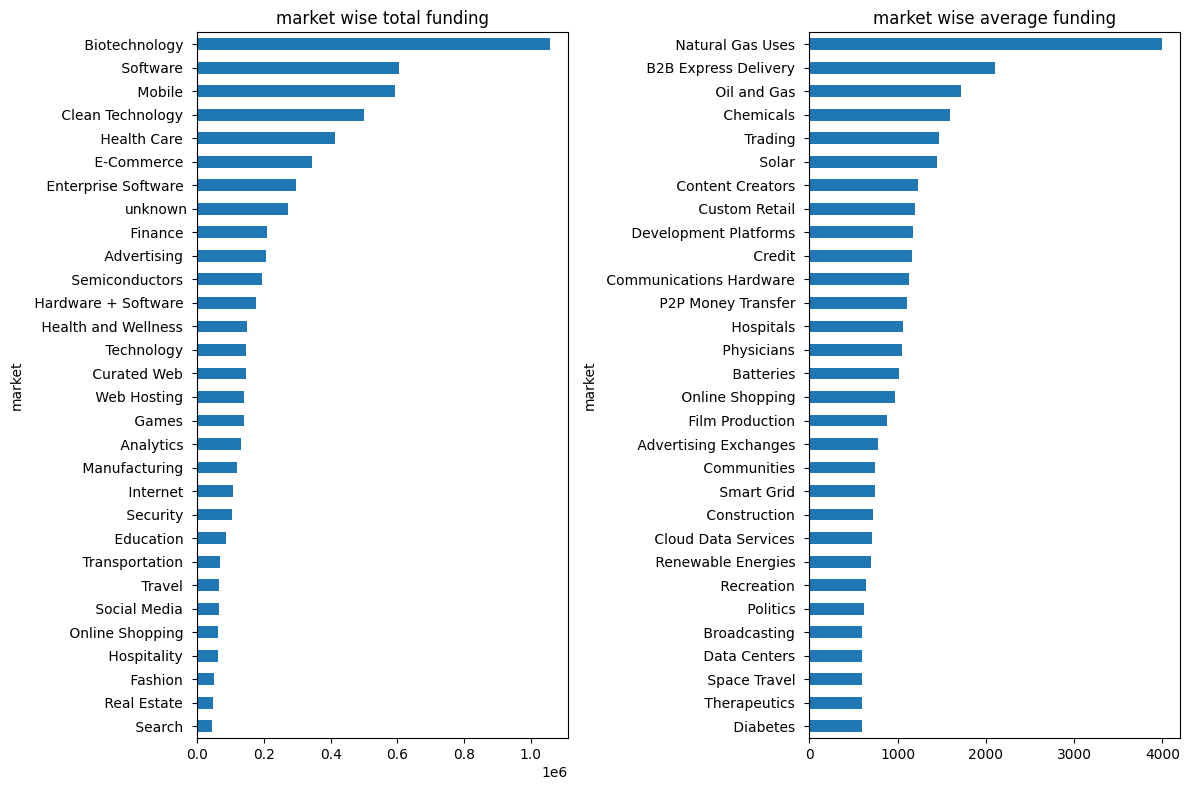

In [ ]:
plot_col(df,'market','barh',30,12,8)

In [ ]:
df.groupby('status')['total_fund'].sum()

status
acquired     1.155582e+06
closed       2.779894e+05
operating    7.509327e+06
unknown      1.687891e+05
Name: total_fund, dtype: float64

In [ ]:
df.groupby('status')['total_fund'].mean()

status
acquired     312.996257
closed       106.795790
operating    179.558773
unknown      128.454387
Name: total_fund, dtype: float64

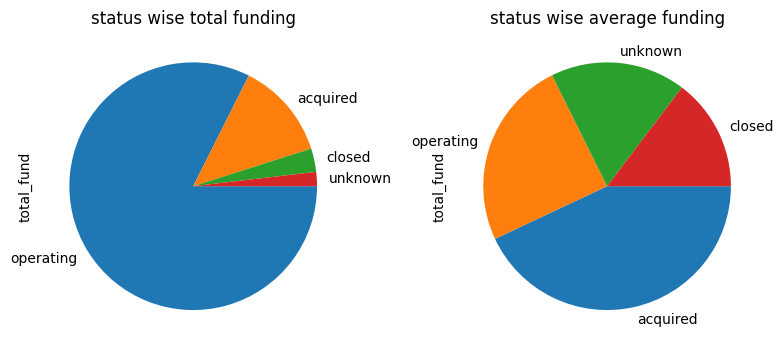

In [ ]:
# plt.figure(figsize=(12,5))

# plt.subplot(1,2,1)
# plt.title('Status wise total funding')
# df.groupby('status')['total_fund'].sum().plot(kind='pie',autopct='%1.1f%%')

# plt.subplot(1,2,2)
# plt.title('Status wise average funding')
# df.groupby('status')['total_fund'].mean().plot(kind='pie',autopct='%1.1f%%')

# plt.tight_layout()
# plt.show()


plot_col(df,'status','pie',4,8,8)


In [ ]:
df.groupby('country_code')['total_fund'].sum().sort_values(ascending=False)

country_code
USA       6.545616e+06
CHN       5.354635e+05
others    3.328795e+05
GBR       3.200695e+05
IND       2.093206e+05
              ...     
MOZ       0.000000e+00
LAO       0.000000e+00
JEY       0.000000e+00
BRN       0.000000e+00
ALB       0.000000e+00
Name: total_fund, Length: 116, dtype: float64

In [ ]:
df.groupby('country_code')['total_fund'].mean().sort_values(ascending=False)


country_code
BMU    1879.165000
MAF     584.400000
CHN     432.173968
MYS     415.373285
LUX     294.917054
          ...     
MOZ       0.000000
LAO       0.000000
BRN       0.000000
JEY       0.000000
ALB       0.000000
Name: total_fund, Length: 116, dtype: float64

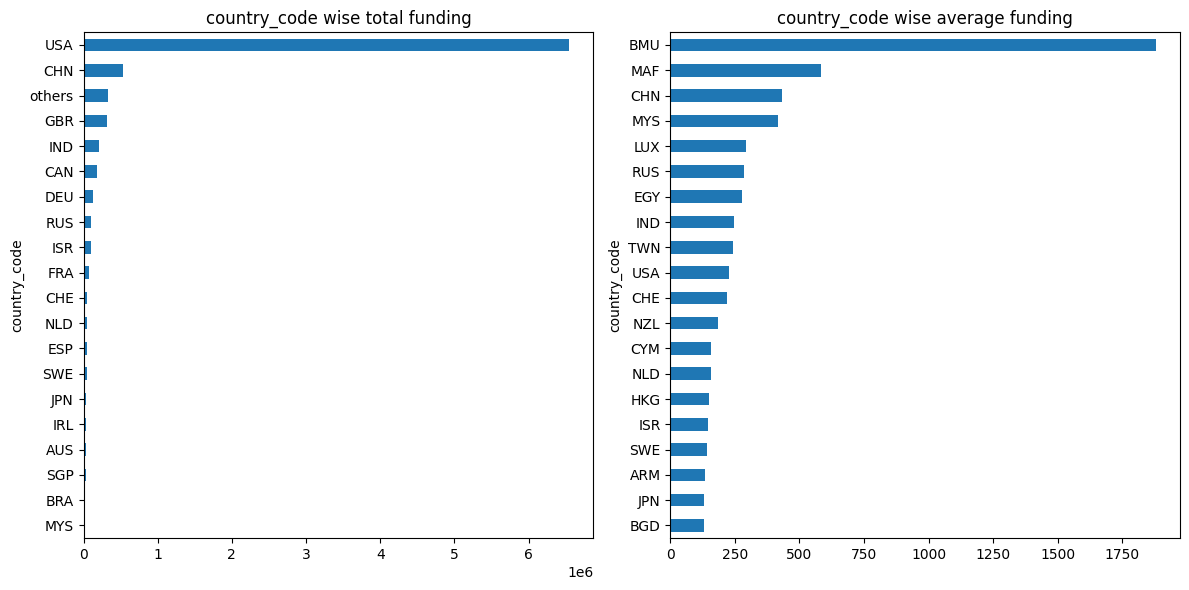

In [ ]:
plot_col(df,'country_code','barh',20,12,6)


In [ ]:
df.groupby('state_code')['total_fund'].sum().sort_values(ascending=False)

state_code
CA        2.845062e+06
others    2.386339e+06
NY        8.192515e+05
MA        5.852143e+05
TX        3.240538e+05
              ...     
SD        7.307170e+02
WV        6.823582e+02
AK        2.355042e+02
WY        1.385298e+02
PE        2.350000e+01
Name: total_fund, Length: 62, dtype: float64

In [ ]:
df.groupby('state_code')['total_fund'].mean().sort_values(ascending=False)

state_code
CT    327.925368
MA    297.213977
CA    286.887399
NY    281.143278
SK    241.610270
         ...    
NV     41.249560
AK     19.625348
AR     18.510724
PE     11.750000
WY      8.148814
Name: total_fund, Length: 62, dtype: float64

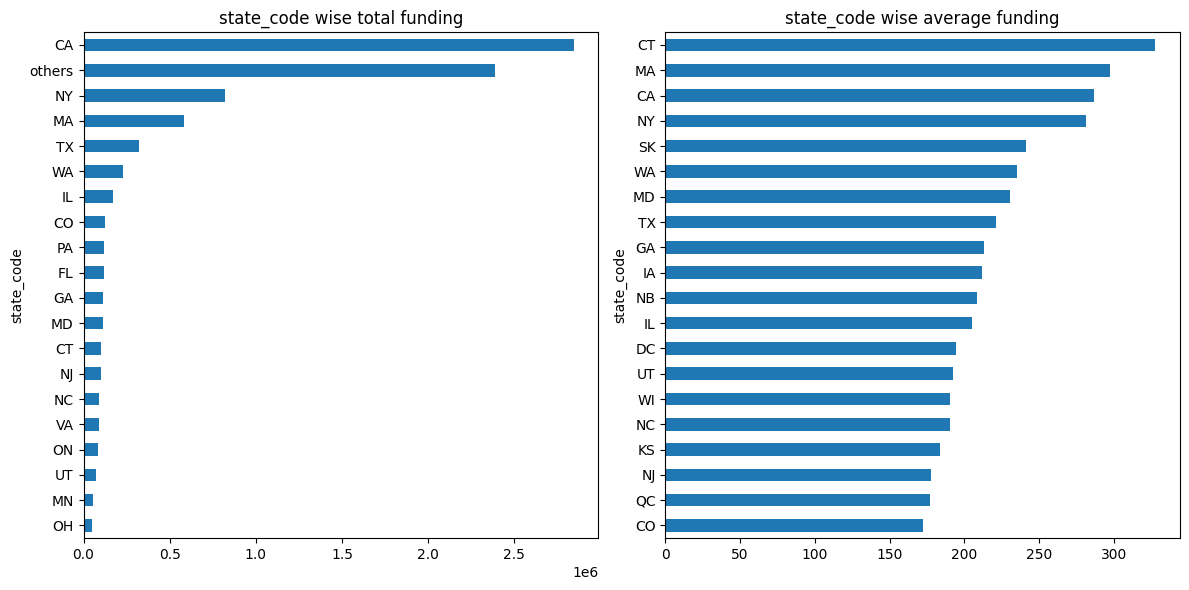

In [ ]:
plot_col(df,'state_code','barh',20,12,6)

In [ ]:
df.groupby('region')['total_fund'].sum().sort_values(ascending=False)

region
SF Bay Area      2.206029e+06
New York City    7.669491e+05
Boston           5.503776e+05
others           3.328795e+05
Los Angeles      2.538058e+05
                     ...     
UGA - Other      0.000000e+00
BRN - Other      0.000000e+00
LAO - Other      0.000000e+00
Farum            0.000000e+00
TUN - Other      0.000000e+00
Name: total_fund, Length: 1090, dtype: float64

In [ ]:
df.groupby('region')['total_fund'].mean().sort_values(ascending=False)

region
West Sussex       5410.000000
Burleigh Heads    3821.068900
Spruce Grove      2400.000000
Bermuda           1879.165000
Lyngby            1870.284667
                     ...     
Durban               0.000000
Douglas              0.000000
Vijayawada           0.000000
MOZ - Other          0.000000
Maple Ridge          0.000000
Name: total_fund, Length: 1090, dtype: float64

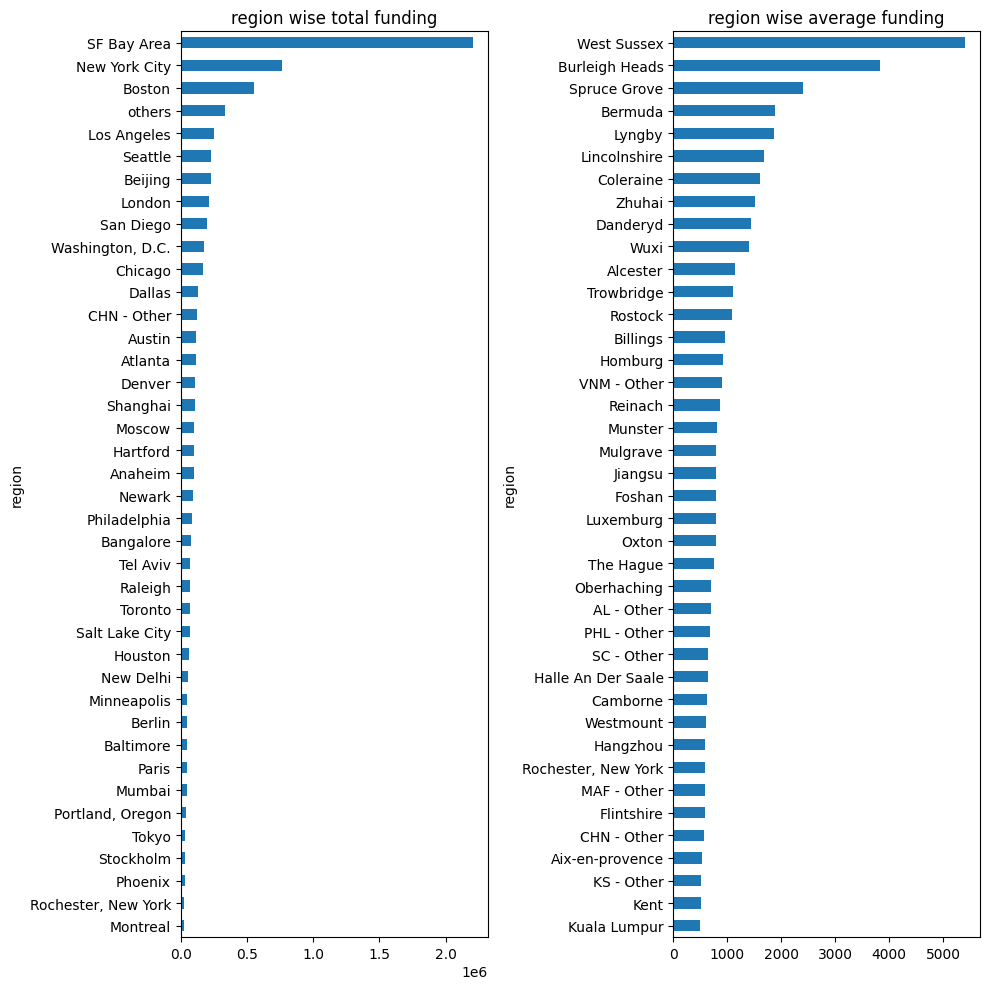

In [ ]:
plot_col(df,'region','barh',40,10,10)

In [ ]:
df.groupby('city')['total_fund'].sum().sort_values(ascending=False)

city
New York                      744319.80652
San Francisco                 662816.62700
others                        464832.07992
Beijing                       225777.60375
Palo Alto                     196343.61730
                                  ...     
Neuchatel                          0.00000
Neustadt An Der Weinstraße         0.00000
Gladstone                          0.00000
Neutral Bay                        0.00000
's-hertogenbosch                   0.00000
Name: total_fund, Length: 4189, dtype: float64

In [ ]:
df.groupby('city')['total_fund'].mean().sort_values(ascending=False)

city
Sussex               19000.000
Dania                11840.000
Normal               11000.000
Admiralty             8040.000
Lincolnshire          5054.065
                       ...    
Holiday                  0.000
Hilversum                0.000
Hillerød                 0.000
Higashi-shinagawa        0.000
's-hertogenbosch         0.000
Name: total_fund, Length: 4189, dtype: float64

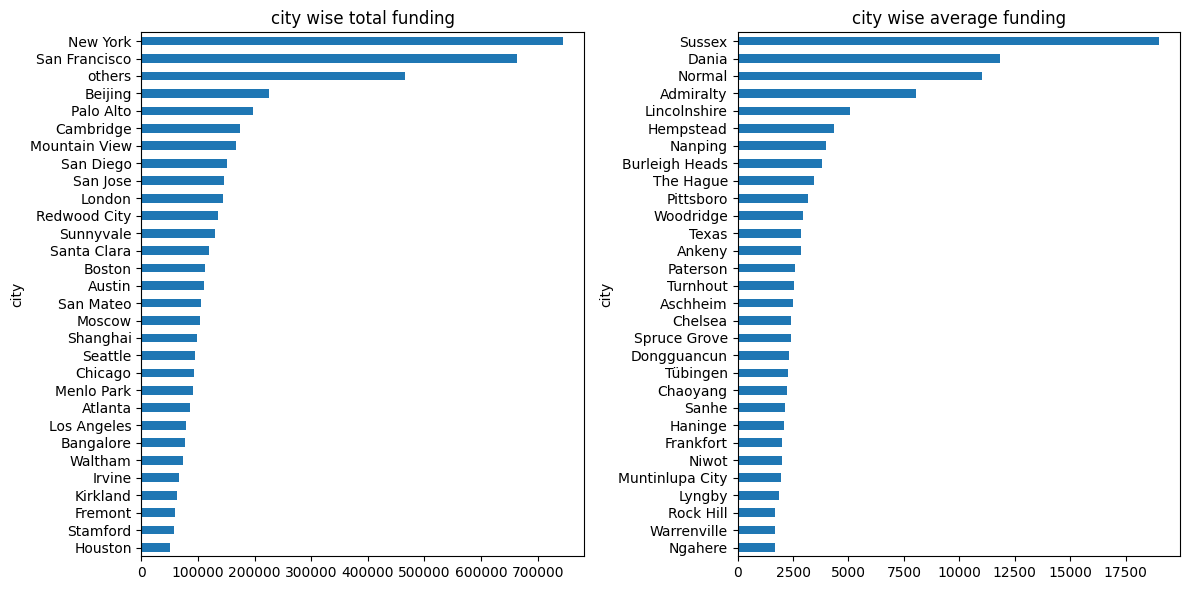

In [ ]:
plot_col(df,'city','barh',30,12,6)

analyze the Funding Rounds and Types

In [ ]:
funding_rounds_cols = ['round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']
funding_rounds_amount = df[funding_rounds_cols].sum()

# Calculate the frequency of each funding type
funding_types_cols = ['seed', 'venture','equity_crowdfunding', 'undisclosed', 'convertible_note',
        'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
        'post_ipo_debt', 'secondary_market', 'product_crowdfunding']
funding_types_amount = df[funding_types_cols].sum()

print(funding_rounds_amount)
print(funding_types_amount)

round_A    614986.48322
round_B    738055.52874
round_C    595903.80184
round_D    364618.13370
round_E    169309.42897
round_F     83930.49209
round_G     28511.22473
round_H      7036.00000
dtype: float64
seed                    1.074394e+05
venture                 3.708369e+06
equity_crowdfunding     3.047023e+03
undisclosed             6.437880e+04
convertible_note        1.155074e+04
debt_financing          9.334670e+05
angel                   3.234184e+04
grant                   8.050745e+04
private_equity          1.025485e+06
post_ipo_equity         3.010150e+05
post_ipo_debt           2.192259e+05
secondary_market        1.901184e+04
product_crowdfunding    3.497356e+03
dtype: float64


In [ ]:
# Count how often each funding round occurs (non-zero values)
funding_rounds_freq = (df[funding_rounds_cols] > 0).sum()

# Count how often each funding type occurs (non-zero values)
funding_types_freq = (df[funding_types_cols] > 0).sum()

print(f"Funding Rounds Frequency:\n{funding_rounds_freq}")
print(f"Funding Types Frequency:\n{funding_types_freq}")


Funding Rounds Frequency:
round_A    9003
round_B    5447
round_C    2837
round_D    1288
round_E     516
round_F     172
round_G      34
round_H       4
dtype: int64
Funding Types Frequency:
seed                    13840
venture                 23277
equity_crowdfunding       522
undisclosed               952
convertible_note          557
debt_financing           4225
angel                    3129
grant                    1142
private_equity           1373
post_ipo_equity           316
post_ipo_debt              75
secondary_market           19
product_crowdfunding      213
dtype: int64


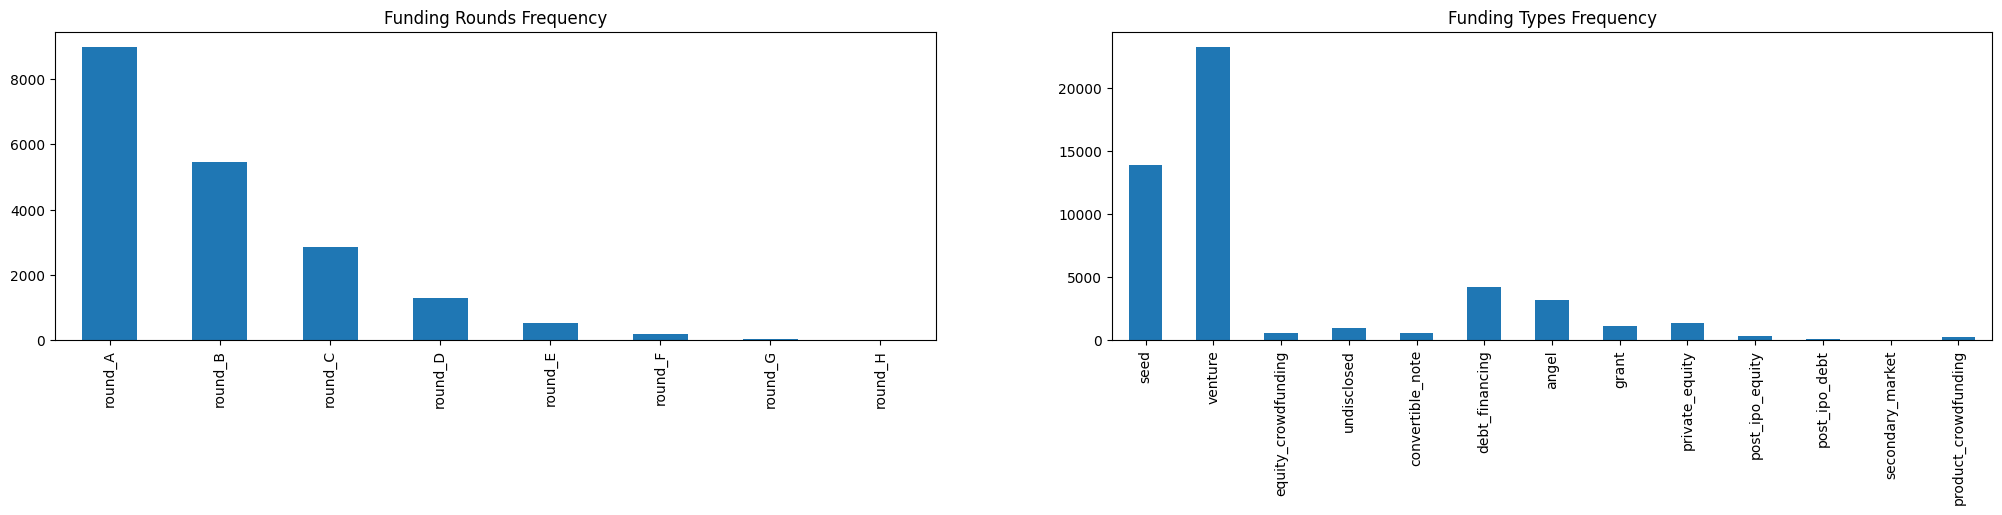

In [ ]:
plt.subplot(1,2,1)
funding_rounds_freq.plot(kind='bar', title='Funding Rounds Frequency')

plt.subplot(1,2,2)
funding_types_freq.plot(kind='bar', title='Funding Types Frequency')
plt.show()

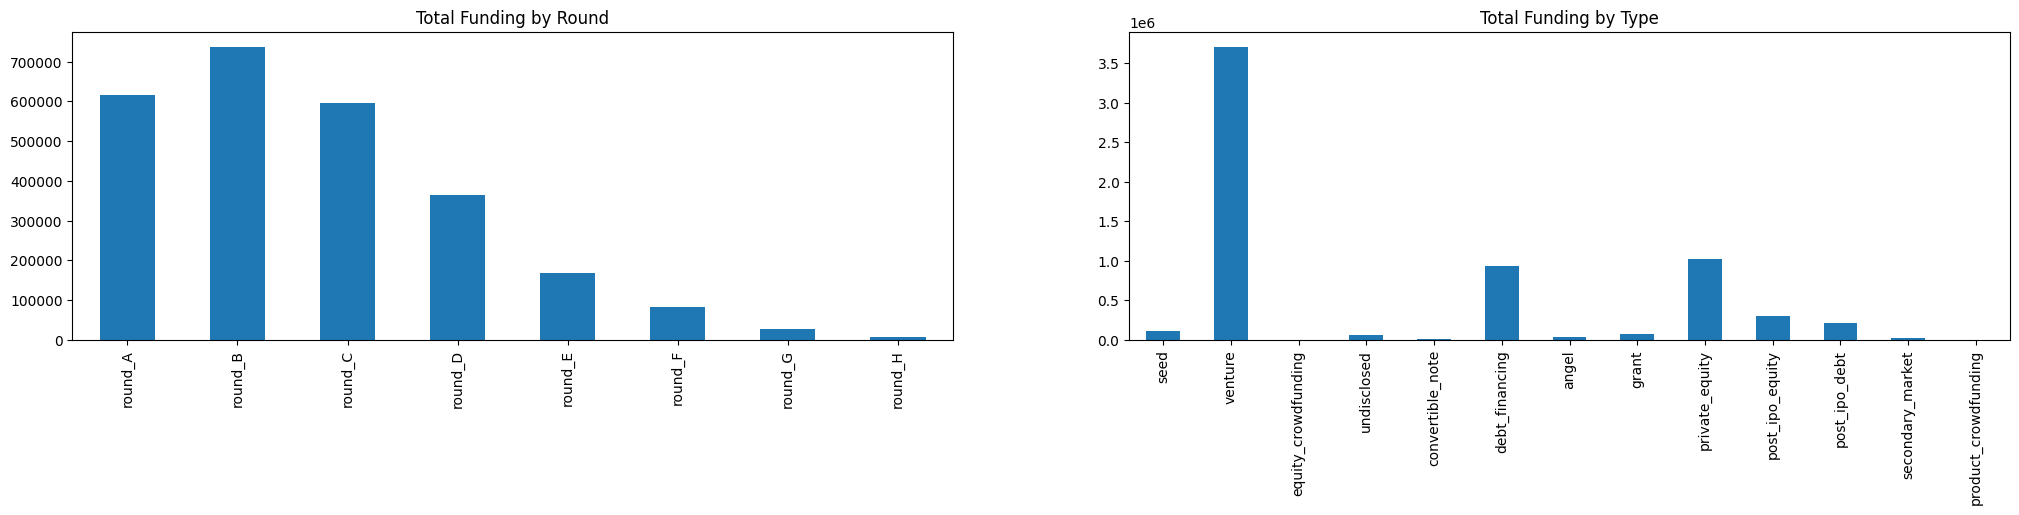

In [ ]:
# Bar chart for total funding by round
plt.subplot(1,2,1)
funding_rounds_amount.plot(kind='bar', title='Total Funding by Round')

plt.subplot(1,2,2)
funding_types_amount.plot(kind='bar', title='Total Funding by Type')
plt.show()


In [ ]:
# create sunburst kind of chart showing funding in each round and type

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming funding_rounds_amount and funding_types_amount are already calculated

# Convert to a DataFrame
funding_rounds_amount_df = pd.DataFrame({'name': funding_rounds_amount.index, 'amount': funding_rounds_amount.values, 'level': 'Round'})
funding_types_amount_df = pd.DataFrame({'name': funding_types_amount.index, 'amount': funding_types_amount.values, 'level': 'Type'})

# Concatenate both DataFrames
sunburst_data = pd.concat([funding_rounds_amount_df, funding_types_amount_df], ignore_index=True)

# Create the sunburst chart using Plotly Express
fig = px.sunburst(
    data_frame=sunburst_data,
    path=['level', 'name'],  # level defines 'Round' or 'Type' and name is the specific round/type
    values='amount',
    title="Sunburst Chart of Funding by Type and Round"
)

# Show the plot
fig.show()


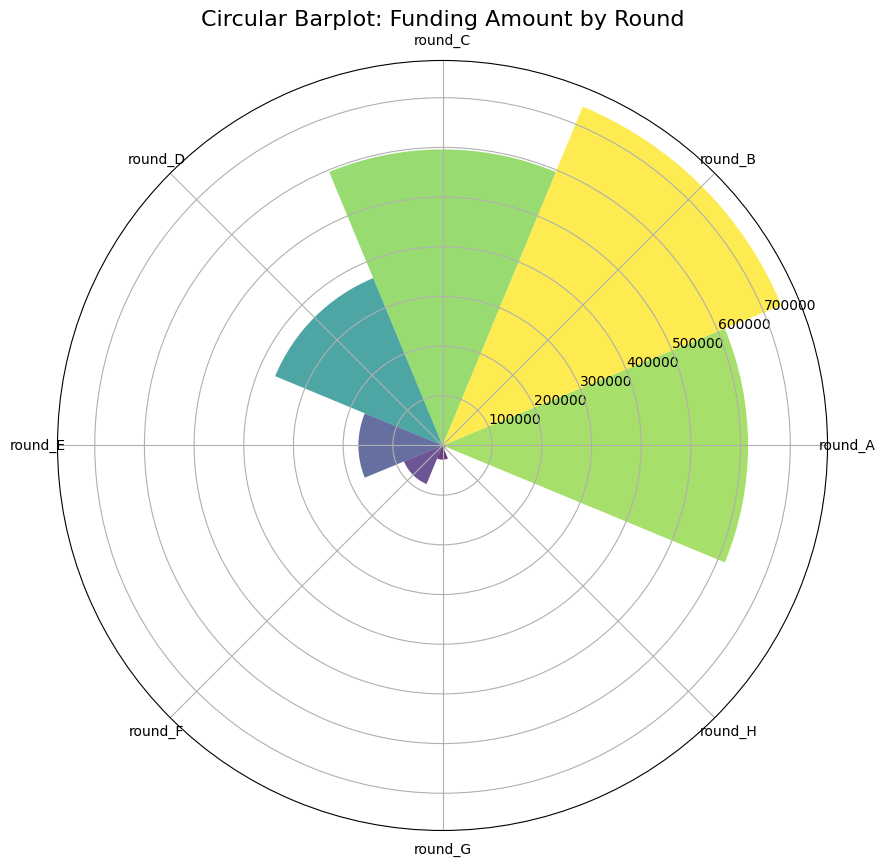

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (you can replace this with your actual data)
categories = funding_rounds_amount.index.tolist()  # Example: round_A, round_B, etc.
values = funding_rounds_amount.values  # Corresponding funding amount

# Number of bars
N = len(categories)

# Create the angles for the bars
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# The width of each bar
width = 2 * np.pi / N

# Create polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Plot bars
bars = ax.bar(angles, values, width=width, bottom=0.0)

# Set the labels for each bar (funding round type or category)
ax.set_xticks(angles)
ax.set_xticklabels(categories, fontsize=10)

# Customize bar appearance (optional)
for bar, value in zip(bars, values):
    bar.set_facecolor(plt.cm.viridis(value / max(values)))
    bar.set_alpha(0.8)

# Show the plot
plt.title("Circular Barplot: Funding Amount by Round", size=16)
plt.show()


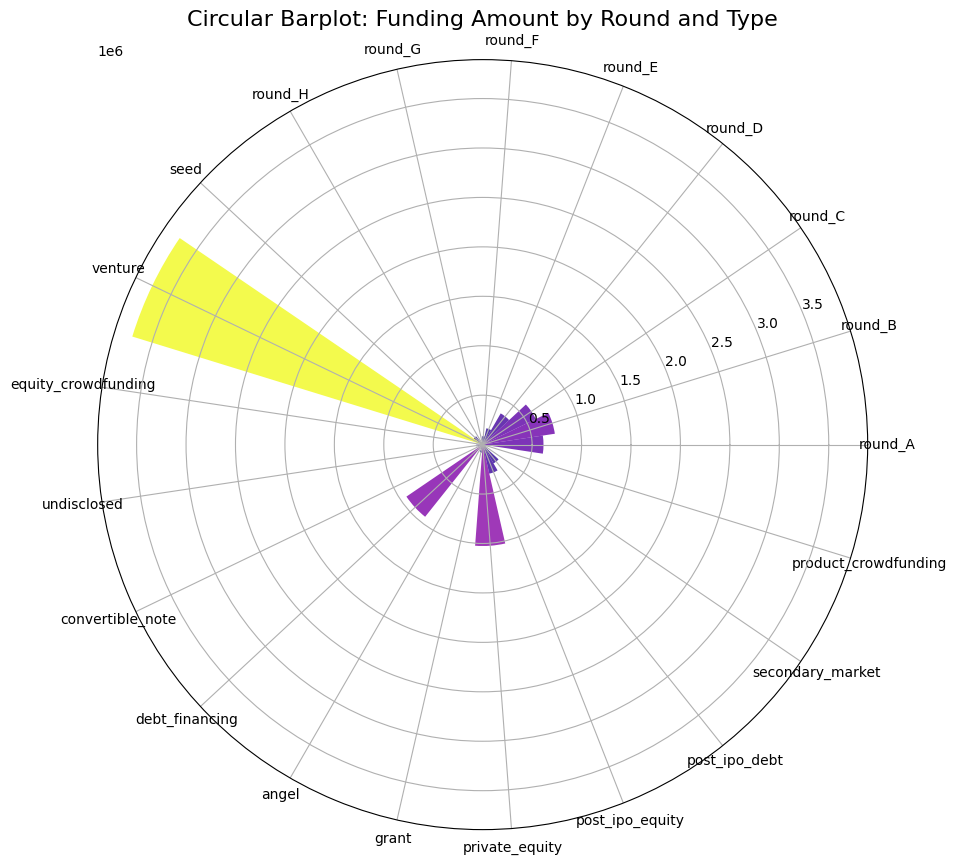

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example data (use your actual data here)
rounds_data = funding_rounds_amount.copy()
types_data = funding_types_amount.copy()

# Combine the data for rounds and types into a single DataFrame
combined_data = pd.concat([rounds_data, types_data], axis=0)
categories = combined_data.index.tolist()  # Category names (rounds + types)
values = combined_data.values  # Corresponding funding amounts

# Number of bars (total categories)
N = len(categories)

# Create the angles for the bars
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# The width of each bar
width = 2 * np.pi / N

# Create polar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Plot bars
bars = ax.bar(angles, values, width=width, bottom=0.0)

# Set the labels for each bar (funding rounds and types)
ax.set_xticks(angles)
ax.set_xticklabels(categories, fontsize=10)

# Customize bar appearance (optional)
for bar, value in zip(bars, values):
    bar.set_facecolor(plt.cm.plasma(value / max(values)))  # Different colormap to distinguish better
    bar.set_alpha(0.8)

# Set title
plt.title("Circular Barplot: Funding Amount by Round and Type", size=16)

# Show the plot
plt.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Example data (use your actual data here)
# Assuming you already have funding_rounds_amount and funding_types_amount as Series
rounds_data = funding_rounds_amount.copy()
types_data = funding_types_amount.copy()

# Combine the data into one DataFrame
combined_data = pd.concat([rounds_data, types_data], axis=0)
categories = combined_data.index.tolist()  # Category names (rounds + types)
values = combined_data.values  # Corresponding funding amounts

# Create the circular bar plot using Plotly
fig = go.Figure()

# Add bars for each category
fig.add_trace(go.Barpolar(
    r=values,
    theta=categories,
    width=[360 / len(categories)] * len(categories),  # Width of bars (evenly distributed)
    marker=dict(color=values, colorscale='Viridis', colorbar=dict(title='Funding Amount')),
    name='Funding Amount'
))

# Update layout for polar coordinates
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, max(values)]),
        angularaxis=dict(tickvals=categories, ticktext=categories),
    ),
    title="Circular Barplot: Funding Amount by Round and Type"
)

# Show the plot
fig.show()


In [ ]:
# Correlation between funding rounds and total funding
corr_rounds_funding = df[['funding_rounds', 'total_fund']].corr()

print("Correlation Between Funding Rounds and Total Funding:\n", corr_rounds_funding)


Correlation Between Funding Rounds and Total Funding:
                 funding_rounds  total_fund
funding_rounds        1.000000    0.164647
total_fund            0.164647    1.000000


In [ ]:
# Correlation between funding types and total funding
corr_types_funding = df[funding_types_cols + ['total_fund']].corr()

print("Correlation Between Funding Types and Total Funding:\n", corr_types_funding)


Correlation Between Funding Types and Total Funding:
                           seed   venture  equity_crowdfunding  undisclosed  \
seed                  1.000000 -0.011546            -0.003870    -0.004654   
venture              -0.011546  1.000000            -0.007327     0.008730   
equity_crowdfunding  -0.003870 -0.007327             1.000000    -0.001347   
undisclosed          -0.004654  0.008730            -0.001347     1.000000   
convertible_note     -0.001362  0.000782            -0.000254    -0.000680   
debt_financing       -0.002339  0.008726            -0.000414    -0.000342   
angel                -0.002694  0.005439             0.018886     0.004022   
grant                -0.005057  0.007887            -0.000891    -0.001134   
private_equity       -0.008914  0.063483            -0.002019     0.008599   
post_ipo_equity      -0.004487  0.008941            -0.000701     0.002934   
post_ipo_debt        -0.002623 -0.002743            -0.000399    -0.000565   
secondary_

In [ ]:
# Correlation between funding types and total funding
corr_types_funding = df[funding_rounds_cols + ['total_fund']].corr()

print("Correlation Between Funding Types and Total Funding:\n", corr_types_funding)

Correlation Between Funding Types and Total Funding:
              round_A   round_B   round_C   round_D   round_E   round_F  \
round_A     1.000000  0.268165  0.120633  0.039898  0.047187  0.018403   
round_B     0.268165  1.000000  0.346011  0.121166  0.093949  0.042551   
round_C     0.120633  0.346011  1.000000  0.343870  0.144107  0.053475   
round_D     0.039898  0.121166  0.343870  1.000000  0.240910  0.122004   
round_E     0.047187  0.093949  0.144107  0.240910  1.000000  0.366157   
round_F     0.018403  0.042551  0.053475  0.122004  0.366157  1.000000   
round_G     0.001415  0.009809  0.023298  0.090611  0.297437  0.240141   
round_H    -0.000371  0.004960  0.011551  0.069108  0.303983  0.153170   
total_fund  0.114759  0.183921  0.223834  0.222530  0.199799  0.162318   

             round_G   round_H  total_fund  
round_A     0.001415 -0.000371    0.114759  
round_B     0.009809  0.004960    0.183921  
round_C     0.023298  0.011551    0.223834  
round_D     0.090611  0.0

In [ ]:
# Analyze progression through rounds
progression_counts = df[funding_rounds_cols].gt(0).cumsum(axis=1).iloc[:, -1].value_counts()

print("Progression Through Funding Rounds:\n", progression_counts)


Progression Through Funding Rounds:
 round_H
0    36672
1     8518
2     2699
3     1010
4      355
5      128
6       42
7        5
8        1
Name: count, dtype: int64


In [ ]:
df[funding_rounds_cols].gt(0).cumsum(axis=1).iloc[:,-1].value_counts()

round_H
0    36672
1     8518
2     2699
3     1010
4      355
5      128
6       42
7        5
8        1
Name: count, dtype: int64

Frequency of Funding Rounds/Types: Which rounds/types are most common? Are certain rounds more frequent in certain stages of startup growth?
Impact on Total Funding: Which funding rounds or types contribute the most to total funding?
Progression Patterns: Do startups typically progress through all funding rounds, or do they skip some? Is there a typical sequence (e.g., seed → venture → round A, etc.)?


1. Analyze Typical Progression through Rounds
Start by determining the most common progression paths (i.e., whether startups skip rounds or follow a particular sequence). You can track the progression through different rounds and funding types.
Steps for Analysis:
Step 1: Check if Startups Skip Rounds
You can create a sequence of funding rounds a startup went through, and check if they skip any rounds (e.g., if they raised funding in rounds A and C but skipped B).
Code for Identifying Skipped Rounds:

In [ ]:
df_new = (df[funding_types_cols + funding_rounds_cols] > 0).astype(int)
df_new

seed  venture  equity_crowdfunding  undisclosed  convertible_note  \
0         1        0                    0            0                 0   
1         0        1                    0            0                 0   
2         1        0                    0            0                 0   
3         1        0                    0            0                 0   
4         0        0                    1            0                 0   
...     ...      ...                  ...          ...               ...   
49433     1        0                    0            0                 0   
49434     0        1                    0            0                 0   
49435     1        0                    0            0                 1   
49436     1        0                    0            0                 0   
49437     0        1                    0            0                 0   

       debt_financing  angel  grant  private_equity  post_ipo_equity  ...  \
0                   0      0      0               0                0  ...   
1                   0      0      0               0                0  ...   
2                   0      0      0               0                0  ...   
3                   0      0      0               0                0  ...   
4                   0      0      0               0                0  ...   
...               ...    ...    ...             ...              ...  ...   
49433               0      0      0               0                0  ...   
49434               0      0      0               0                0  ...   
49435               0      0      0               0                0  ...   
49436               0      0      0               0                0  ...   
49437               1      0      0               0                0  ...   

       secondary_market  product_crowdfunding  round_A  round_B  round_C  \
0                     0                     0        0        0        0   
1                     0                     0        0        0        0   
2                     0                     0        0        0        0   
3                     0                     0        0        0        0   
4                     0                     0        0        0        0   
...                 ...                   ...      ...      ...      ...   
49433                 0                     0        0        0        0   
49434                 0                     0        1        0        0   
49435                 0                     0        0        0        0   
49436                 0                     0        0        0        0   
49437                 0                     0        1        1        0   

       round_D  round_E  round_F  round_G  round_H  
0            0        0        0        0        0  
1            0        0        0        0        0  
2            0        0        0        0        0  
3            0        0        0        0        0  
4            0        0        0        0        0  
...        ...      ...      ...      ...      ...  
49433        0        0        0        0        0  
49434        0        0        0        0        0  
49435        0        0        0        0        0  
49436        0        0        0        0        0  
49437        0        0        0        0        0  

[49430 rows x 21 columns]

In [ ]:
# Count occurrences of each combination of funding types and rounds
common_sequences = df_new.groupby(funding_types_cols + funding_rounds_cols).size().sort_values(ascending=False).reset_index()

# Display the most common progression sequences
print("Most common funding sequences:\n")
common_sequences[common_sequences['round_H']==1]


Most common funding sequences:



seed  venture  equity_crowdfunding  undisclosed  convertible_note  \
479     0        1                    0            0                 0   
494     0        1                    0            0                 0   
500     0        1                    0            0                 0   
575     0        1                    0            0                 0   

     debt_financing  angel  grant  private_equity  post_ipo_equity  ...  \
479               0      0      0               0                0  ...   
494               0      0      0               0                0  ...   
500               0      1      0               0                0  ...   
575               1      0      0               1                0  ...   

     product_crowdfunding  round_A  round_B  round_C  round_D  round_E  \
479                     0        0        0        0        0        0   
494                     0        0        1        0        0        0   
500                     0        1        1        1        1        1   
575                     0        0        0        1        1        1   

     round_F  round_G  round_H  0  
479        1        1        1  1  
494        0        0        1  1  
500        1        1        1  1  
575        1        1        1  1  

[4 rows x 22 columns]

In [ ]:
sns.pairplot(df,hue='status')

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x79d61c563130> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x79d61c5623b0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
df[cat_col].columns,df.columns

In [ ]:
/df.to_csv('startup_funding_cleaned.csv',index=False)

In [ ]:
from google.colab import files
files.download('startup_funding_cleaned.csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
df=pd.read_csv('startup_funding_cleaned.csv')


In [ ]:
fund_col=df.columns[16:].to_list()
fund_col.insert(0,'funding_total_usd')

num_col=df.select_dtypes(include='number').columns
cat_col=df.select_dtypes(exclude='number').columns

In [ ]:
cfxv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

! gdown 110tJaSocsCTvgqjJ3LyfzZOmhy8woTfP

In [ ]:
df=pd.read_csv('investments_VC.csv',encoding='latin')
df=df[~df.isna().all(axis=1)]
df.columns=df.columns.str.strip()
df['funding_total_usd']=df['funding_total_usd'].str.strip().str.replace(',','').str.replace('-','0')
df['funding_total_usd']=df['funding_total_usd'].astype('int')
df['name'].fillna('Tell It in 10',inplace=True)
df['category_list']=df['category_list'].str.strip('|').str.split('|')
df['market']=df.apply(lambda row: np.random.choice(row['category_list']) if (pd.isna(row['market']) and isinstance(row['category_list'],list)) else row['market'], axis=1)
df[['category_list','market','status']]=df[['category_list','market','status']].fillna('unknown')
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str,errors='coerce')
    except ValueError:
        return pd.to_datetime(date_str,dayfirst=True,errors='coerce')


df['last_funding_at']=parse_date(df['last_funding_at'])
df.drop(df[df['last_funding_at'].isna()].index,inplace=True)


rep_dic={'0007-05-13':'2013-05-07',
         '0011-11-14':'2014-11-11'
         }
df['first_funding_at']=df['first_funding_at'].replace(rep_dic)
df['first_funding_at']=parse_date(df['first_funding_at'])

df.drop(df[df['first_funding_at'].isna()].index,inplace=True)           # dropping rows where founded_at is messed and funding=0


df['founded_at']=parse_date(df['founded_at'])
df_clean=df[~df['founded_at'].isna()]
med_days=(df_clean['first_funding_at']-df_clean['founded_at']).dt.days.median()
df['founded_at']=df['founded_at'].fillna(df['first_funding_at']-pd.to_timedelta(med_days,unit='d'))

df['founded_month']=df['founded_month']+'-01'
df['founded_month']=parse_date(df['founded_month']).dt.month
df['founded_month'].fillna(df['founded_at'].dt.month,inplace=True)
df['founded_month']=df['founded_month'].astype('int')

df['founded_quarter']=df['founded_quarter'].str.split('').str[-2]
df['founded_quarter'].fillna(df['founded_at'].dt.quarter,inplace=True)
df['founded_quarter']=df['founded_quarter'].astype('int')

# df['founded_year'].fillna(df['founded_at'].dt.year,inplace=True)
# df['founded_year']=df['founded_year'].astype('int')

# df.drop(columns=['permalink','homepage_url'],inplace=True)

# df.fillna('others',inplace=True)